## 데이터 통계 분석

## 모듈 불러오기

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import koreanize_matplotlib
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

## 백엔드 설정

In [8]:
plt.ioff()

## 테마 설정

In [9]:
plt.style.use('bmh')

## 데이터 로드

In [23]:
df_all = pd.read_csv('./data/all_201703-202209.csv', dtype={'회사코드': 'object'})

In [25]:
df_all.shape

(100, 30)

In [26]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   회사명        100 non-null    object
 1   회사코드       100 non-null    object
 2   보고서명       100 non-null    object
 3   보고서코드      100 non-null    object
 4   항목         100 non-null    object
 5   factor_id  100 non-null    object
 6   단위         100 non-null    object
 7   2017년03월   68 non-null     object
 8   2017년06월   68 non-null     object
 9   2017년09월   82 non-null     object
 10  2017년12월   82 non-null     object
 11  2018년03월   94 non-null     object
 12  2018년06월   94 non-null     object
 13  2018년09월   94 non-null     object
 14  2018년12월   94 non-null     object
 15  2019년03월   94 non-null     object
 16  2019년06월   94 non-null     object
 17  2019년09월   94 non-null     object
 18  2019년12월   94 non-null     object
 19  2020년03월   97 non-null     object
 20  2020년06월   97 non-null     object

In [28]:
df_all.drop(columns=['보고서명', '보고서코드'])

,회사명,회사코드,항목,factor_id,단위,2017년03월,2017년06월,2017년09월,2017년12월,2018년03월,...,2020년06월,2020년09월,2020년12월,2021년03월,2021년06월,2021년09월,2021년12월,2022년03월,2022년06월,2022년09월
0,국민은행,0010927,총대출채권_연체율,F000002054,%,0.36,0.30,0.28,0.23,0.27,...,0.22,0.20,0.17,0.17,0.15,0.14,0.12,0.13,0.13,0.15
1,국민은행,0010927,기업대출_연체율,F000002058,%,0.48,0.36,0.34,0.23,0.31,...,0.19,0.19,0.13,0.16,0.14,0.14,0.11,0.11,0.11,0.13
2,국민은행,0010927,기업대출_대기업대출_연체율,F000002062,%,0.80,0.27,0.28,0.31,0.30,...,0.04,0.11,0.00,0.00,0.00,0.08,0.07,0.06,0.07,0.06
3,국민은행,0010927,기업대출_중소기업대출_연체율,F000002066,%,0.42,0.38,0.34,0.22,0.31,...,0.22,0.20,0.15,0.17,0.15,0.14,0.11,0.12,0.11,0.14
4,국민은행,0010927,기기업대출_중소기업대출_(개인사업자)_연체율,F000002070,%,0.24,0.25,0.24,0.14,0.18,...,0.16,0.14,0.10,0.12,0.10,0.11,0.08,0.07,0.08,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,주식회사 카카오뱅크,0015130,건설업,F000002100,백만원,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,주식회사 카카오뱅크,0015130,부동산및임대업,F000002105,백만원,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,전북은행,0010022,기업대출금 계,F000002097,백만원,"6,944,640","6,947,505","6,911,679","6,952,426","7,057,963",...,"7,658,068","7,930,619","8,063,799","8,086,997","7,986,953","8,361,782","8,362,648","8,594,789","8,761,277","8,946,404"
98,전북은행,0010022,건설업,F000002100,백만원,"526,076","526,721","523,254","484,247","485,172",...,"590,224","613,208","522,797","490,737","462,238","459,929","414,836","439,046","418,888","455,827"


In [32]:
df_all[['회사코드', '회사명']].drop_duplicates()

,회사코드,회사명
0,0010927,국민은행
5,0011625,신한은행
10,0010001,우리은행
15,0010022,전북은행
20,0015130,주식회사 카카오뱅크


In [33]:
df_all[['factor_id', '항목']].drop_duplicates()

,factor_id,항목
0,F000002054,총대출채권_연체율
1,F000002058,기업대출_연체율
2,F000002062,기업대출_대기업대출_연체율
3,F000002066,기업대출_중소기업대출_연체율
4,F000002070,기기업대출_중소기업대출_(개인사업자)_연체율
25,F000001192,고정이하여신비율
30,F000002088,대손충당금적립비율(총여신대비)
31,F000002089,대손충당금적립비율(고정이하여신대비)
40,F000001222,업무용고정자산비율
41,F000001223,업무용고정자산비율_업무용고정자산


## 데이터 전처리

In [149]:
df_kb = df_all[df_all['회사코드'] == '0010927'].copy(deep=True)

In [150]:
df_kb

,회사명,회사코드,보고서명,보고서코드,항목,factor_id,단위,2017년03월,2017년06월,2017년09월,...,2020년06월,2020년09월,2020년12월,2021년03월,2021년06월,2021년09월,2021년12월,2022년03월,2022년06월,2022년09월
0,국민은행,0010927,연체율(원화대출금 및 신탁대출금 합계 기준),SDSA040V,총대출채권_연체율,F000002054,%,0.36,0.30,0.28,...,0.22,0.20,0.17,0.17,0.15,0.14,0.12,0.13,0.13,0.15
1,국민은행,0010927,연체율(원화대출금 및 신탁대출금 합계 기준),SDSA040V,기업대출_연체율,F000002058,%,0.48,0.36,0.34,...,0.19,0.19,0.13,0.16,0.14,0.14,0.11,0.11,0.11,0.13
2,국민은행,0010927,연체율(원화대출금 및 신탁대출금 합계 기준),SDSA040V,기업대출_대기업대출_연체율,F000002062,%,0.80,0.27,0.28,...,0.04,0.11,0.00,0.00,0.00,0.08,0.07,0.06,0.07,0.06
3,국민은행,0010927,연체율(원화대출금 및 신탁대출금 합계 기준),SDSA040V,기업대출_중소기업대출_연체율,F000002066,%,0.42,0.38,0.34,...,0.22,0.20,0.15,0.17,0.15,0.14,0.11,0.12,0.11,0.14
4,국민은행,0010927,연체율(원화대출금 및 신탁대출금 합계 기준),SDSA040V,기기업대출_중소기업대출_(개인사업자)_연체율,F000002070,%,0.24,0.25,0.24,...,0.16,0.14,0.10,0.12,0.10,0.11,0.08,0.07,0.08,0.10
25,국민은행,0010927,여신건전성(여신건전성),SDSA015V,고정이하여신비율,F000001192,%,0.78,0.68,0.66,...,0.33,0.32,0.28,0.29,0.26,0.23,0.20,0.20,0.19,0.19
30,국민은행,0010927,여신건전성(대손충당금 적립비율),SDSA042V,대손충당금적립비율(총여신대비),F000002088,%,0.74,0.63,0.61,...,0.45,0.45,0.46,0.45,0.45,0.43,0.46,0.46,0.48,0.49
31,국민은행,0010927,여신건전성(대손충당금 적립비율),SDSA042V,대손충당금적립비율(고정이하여신대비),F000002089,%,95.75,91.84,92.73,...,134.46,140.39,165.20,156.74,172.75,182.27,225.30,231.17,254.55,252.17
40,국민은행,0010927,유동성(유동성),SDSA018V,업무용고정자산비율,F000001222,%,14.74,14.41,13.72,...,11.92,11.90,11.43,11.03,10.60,10.18,10.25,10.09,9.85,9.60
41,국민은행,0010927,유동성(유동성),SDSA018V,업무용고정자산비율_업무용고정자산,F000001223,백만원,"3,813,941","3,788,014","3,696,119",...,"3,924,086","3,966,454","3,924,545","3,891,467","3,852,335","3,857,604","3,802,005","3,779,834","3,721,371","3,685,415"


In [151]:
df_kb.columns

Index(['회사명', '회사코드', '보고서명', '보고서코드', '항목', 'factor_id', '단위', '2017년03월',
       '2017년06월', '2017년09월', '2017년12월', '2018년03월', '2018년06월', '2018년09월',
       '2018년12월', '2019년03월', '2019년06월', '2019년09월', '2019년12월', '2020년03월',
       '2020년06월', '2020년09월', '2020년12월', '2021년03월', '2021년06월', '2021년09월',
       '2021년12월', '2022년03월', '2022년06월', '2022년09월'],
      dtype='object')

In [152]:
df_kb = df_kb.drop(columns=['회사명', '회사코드', '보고서명', '보고서코드', 'factor_id', '단위'])

In [153]:
df_kb

,항목,2017년03월,2017년06월,2017년09월,2017년12월,2018년03월,2018년06월,2018년09월,2018년12월,2019년03월,...,2020년06월,2020년09월,2020년12월,2021년03월,2021년06월,2021년09월,2021년12월,2022년03월,2022년06월,2022년09월
0,총대출채권_연체율,0.36,0.30,0.28,0.23,0.27,0.25,0.26,0.24,0.28,...,0.22,0.20,0.17,0.17,0.15,0.14,0.12,0.13,0.13,0.15
1,기업대출_연체율,0.48,0.36,0.34,0.23,0.31,0.25,0.26,0.23,0.27,...,0.19,0.19,0.13,0.16,0.14,0.14,0.11,0.11,0.11,0.13
2,기업대출_대기업대출_연체율,0.80,0.27,0.28,0.31,0.30,0.30,0.04,0.02,0.04,...,0.04,0.11,0.00,0.00,0.00,0.08,0.07,0.06,0.07,0.06
3,기업대출_중소기업대출_연체율,0.42,0.38,0.34,0.22,0.31,0.24,0.30,0.26,0.31,...,0.22,0.20,0.15,0.17,0.15,0.14,0.11,0.12,0.11,0.14
4,기기업대출_중소기업대출_(개인사업자)_연체율,0.24,0.25,0.24,0.14,0.18,0.16,0.21,0.20,0.24,...,0.16,0.14,0.10,0.12,0.10,0.11,0.08,0.07,0.08,0.10
25,고정이하여신비율,0.78,0.68,0.66,0.58,0.58,0.54,0.48,0.48,0.47,...,0.33,0.32,0.28,0.29,0.26,0.23,0.20,0.20,0.19,0.19
30,대손충당금적립비율(총여신대비),0.74,0.63,0.61,0.58,0.69,0.65,0.59,0.58,0.56,...,0.45,0.45,0.46,0.45,0.45,0.43,0.46,0.46,0.48,0.49
31,대손충당금적립비율(고정이하여신대비),95.75,91.84,92.73,99.67,117.63,119.55,121.99,122.04,119.84,...,134.46,140.39,165.20,156.74,172.75,182.27,225.30,231.17,254.55,252.17
40,업무용고정자산비율,14.74,14.41,13.72,13.96,13.58,13.11,13.04,13.42,13.29,...,11.92,11.90,11.43,11.03,10.60,10.18,10.25,10.09,9.85,9.60
41,업무용고정자산비율_업무용고정자산,"3,813,941","3,788,014","3,696,119","3,712,075","3,699,067","3,697,579","3,767,671","3,830,834","3,864,212",...,"3,924,086","3,966,454","3,924,545","3,891,467","3,852,335","3,857,604","3,802,005","3,779,834","3,721,371","3,685,415"


In [154]:
df_kb = df_kb.T

In [155]:
df_kb.columns = list(df_kb.loc['항목'])

In [156]:
df_kb = df_kb.drop('항목')

In [157]:
for col in df_kb.columns:
    df_kb[col] = df_kb[col].str.replace(',', '')

In [158]:
df_kb = df_kb.astype('float')

In [159]:
# df_kb = df_kb.reset_index(names='연월')

In [160]:
df_kb

,총대출채권_연체율,기업대출_연체율,기업대출_대기업대출_연체율,기업대출_중소기업대출_연체율,기기업대출_중소기업대출_(개인사업자)_연체율,고정이하여신비율,대손충당금적립비율(총여신대비),대손충당금적립비율(고정이하여신대비),업무용고정자산비율,업무용고정자산비율_업무용고정자산,업무용고정자산비율_자기자본,유동성커버리지비율,유동성커버리지비율_총 고유동성자산,유동성커버리지비율_순현금유출액,순안정자금조달비율,순안정자금조달비율_안정자금가용금액,순안정자금조달비율_안정자금조달필요금액,기업대출금 계,건설업,부동산및임대업
2017년03월,0.36,0.48,0.80,0.42,0.24,0.78,0.74,95.75,14.74,3813941.0,25877980.0,109.67,37320332.0,34028799.0,NaN,NaN,NaN,96721386.0,2925668.0,22786148.0
2017년06월,0.30,0.36,0.27,0.38,0.25,0.68,0.63,91.84,14.41,3788014.0,26287425.0,103.99,38737306.0,37252093.0,NaN,NaN,NaN,99282860.0,2832146.0,23581452.0
2017년09월,0.28,0.34,0.28,0.34,0.24,0.66,0.61,92.73,13.72,3696119.0,26940022.0,95.54,39783521.0,41642500.0,NaN,NaN,NaN,102105034.0,2804477.0,24433757.0
2017년12월,0.23,0.23,0.31,0.22,0.14,0.58,0.58,99.67,13.96,3712075.0,26590641.0,100.00,43946981.0,43946936.0,NaN,NaN,NaN,102992178.0,2550776.0,25048207.0
2018년03월,0.27,0.31,0.30,0.31,0.18,0.58,0.69,117.63,13.58,3699067.0,27238316.0,104.34,45988404.0,44077488.0,122.10,235516381.0,192889088.0,106189412.0,2655585.0,25778745.0
2018년06월,0.25,0.25,0.30,0.24,0.16,0.54,0.65,119.55,13.11,3697579.0,28211691.0,101.79,47275474.0,46444840.0,121.50,240136281.0,197649724.0,108399325.0,2635701.0,26038783.0
2018년09월,0.26,0.26,0.04,0.30,0.21,0.48,0.59,121.99,13.04,3767671.0,28890783.0,98.02,47241357.0,48193666.0,120.12,244215467.0,203313085.0,112123764.0,2689017.0,26730690.0
2018년12월,0.24,0.23,0.02,0.26,0.20,0.48,0.58,122.04,13.42,3830834.0,28546209.0,102.20,49574578.0,48508462.0,121.66,248330155.0,204115969.0,113588659.0,2646142.0,27501261.0
2019년03월,0.28,0.27,0.04,0.31,0.24,0.47,0.56,119.84,13.29,3864212.0,29086533.0,102.49,51305757.0,50059433.0,118.91,245227026.0,206224120.0,113155799.0,2764002.0,26746927.0
2019년06월,0.28,0.25,0.02,0.29,0.21,0.45,0.52,114.96,13.12,3924633.0,29917587.0,102.76,51286008.0,49910425.0,118.15,246893639.0,208973841.0,114519124.0,2756485.0,26462617.0


## 파생변수 선언

In [161]:
df_kb['건설/부동산/임대 대출금 비율'] = round((df_kb['건설업'] + df_kb['부동산및임대업']) / df_kb['기업대출금 계'] * 100, 2)

In [162]:
df_kb

,총대출채권_연체율,기업대출_연체율,기업대출_대기업대출_연체율,기업대출_중소기업대출_연체율,기기업대출_중소기업대출_(개인사업자)_연체율,고정이하여신비율,대손충당금적립비율(총여신대비),대손충당금적립비율(고정이하여신대비),업무용고정자산비율,업무용고정자산비율_업무용고정자산,...,유동성커버리지비율,유동성커버리지비율_총 고유동성자산,유동성커버리지비율_순현금유출액,순안정자금조달비율,순안정자금조달비율_안정자금가용금액,순안정자금조달비율_안정자금조달필요금액,기업대출금 계,건설업,부동산및임대업,건설/부동산/임대 대출금 비율
2017년03월,0.36,0.48,0.80,0.42,0.24,0.78,0.74,95.75,14.74,3813941.0,...,109.67,37320332.0,34028799.0,NaN,NaN,NaN,96721386.0,2925668.0,22786148.0,26.58
2017년06월,0.30,0.36,0.27,0.38,0.25,0.68,0.63,91.84,14.41,3788014.0,...,103.99,38737306.0,37252093.0,NaN,NaN,NaN,99282860.0,2832146.0,23581452.0,26.60
2017년09월,0.28,0.34,0.28,0.34,0.24,0.66,0.61,92.73,13.72,3696119.0,...,95.54,39783521.0,41642500.0,NaN,NaN,NaN,102105034.0,2804477.0,24433757.0,26.68
2017년12월,0.23,0.23,0.31,0.22,0.14,0.58,0.58,99.67,13.96,3712075.0,...,100.00,43946981.0,43946936.0,NaN,NaN,NaN,102992178.0,2550776.0,25048207.0,26.80
2018년03월,0.27,0.31,0.30,0.31,0.18,0.58,0.69,117.63,13.58,3699067.0,...,104.34,45988404.0,44077488.0,122.10,235516381.0,192889088.0,106189412.0,2655585.0,25778745.0,26.78
2018년06월,0.25,0.25,0.30,0.24,0.16,0.54,0.65,119.55,13.11,3697579.0,...,101.79,47275474.0,46444840.0,121.50,240136281.0,197649724.0,108399325.0,2635701.0,26038783.0,26.45
2018년09월,0.26,0.26,0.04,0.30,0.21,0.48,0.59,121.99,13.04,3767671.0,...,98.02,47241357.0,48193666.0,120.12,244215467.0,203313085.0,112123764.0,2689017.0,26730690.0,26.24
2018년12월,0.24,0.23,0.02,0.26,0.20,0.48,0.58,122.04,13.42,3830834.0,...,102.20,49574578.0,48508462.0,121.66,248330155.0,204115969.0,113588659.0,2646142.0,27501261.0,26.54
2019년03월,0.28,0.27,0.04,0.31,0.24,0.47,0.56,119.84,13.29,3864212.0,...,102.49,51305757.0,50059433.0,118.91,245227026.0,206224120.0,113155799.0,2764002.0,26746927.0,26.08
2019년06월,0.28,0.25,0.02,0.29,0.21,0.45,0.52,114.96,13.12,3924633.0,...,102.76,51286008.0,49910425.0,118.15,246893639.0,208973841.0,114519124.0,2756485.0,26462617.0,25.51


## 상관계수 구하기

### '기업대출_연체율' & '나머지 변수' 의 상관계수

기업대출_연체율 & 총대출채권_연체율 상관계수 : 0.9357420182537239


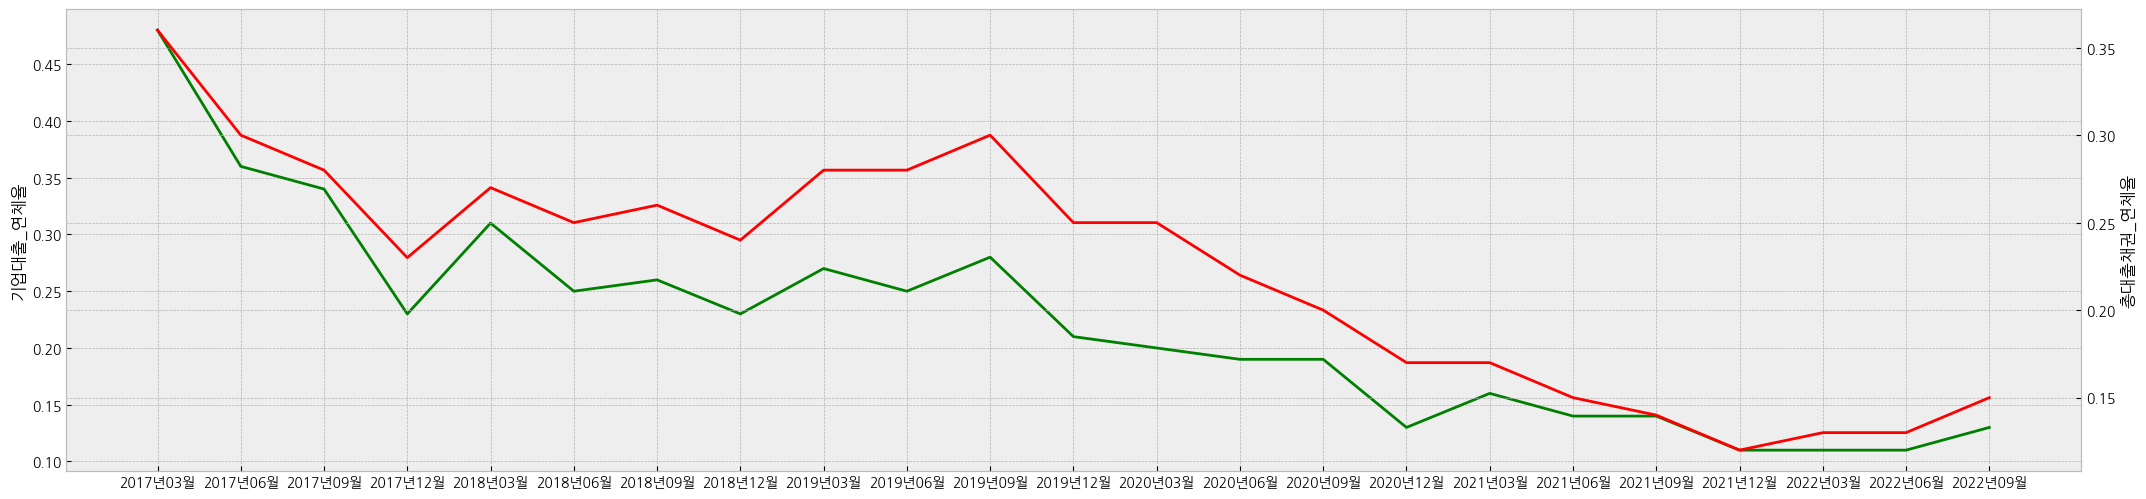



기업대출_연체율 & 기업대출_대기업대출_연체율 상관계수 : 0.7641788480156846


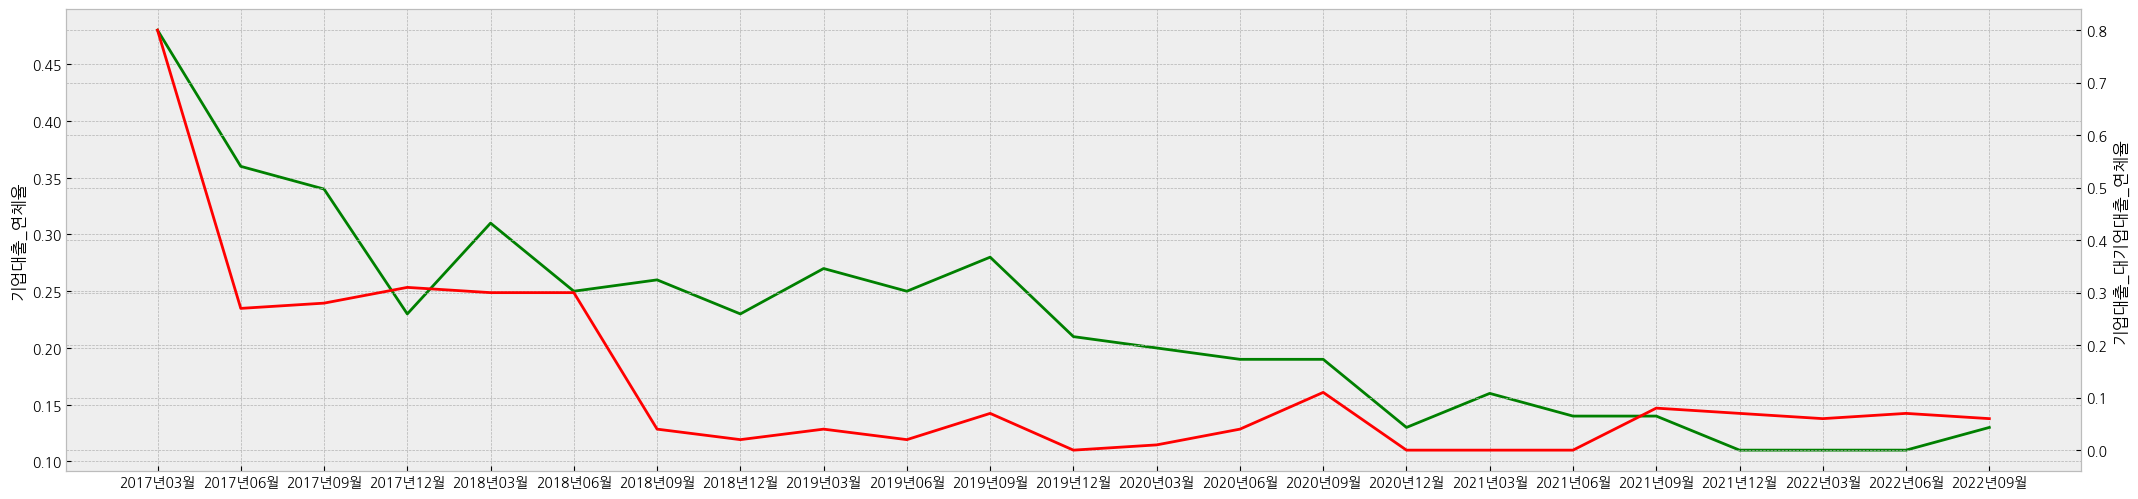



기업대출_연체율 & 기업대출_중소기업대출_연체율 상관계수 : 0.9696187888324219


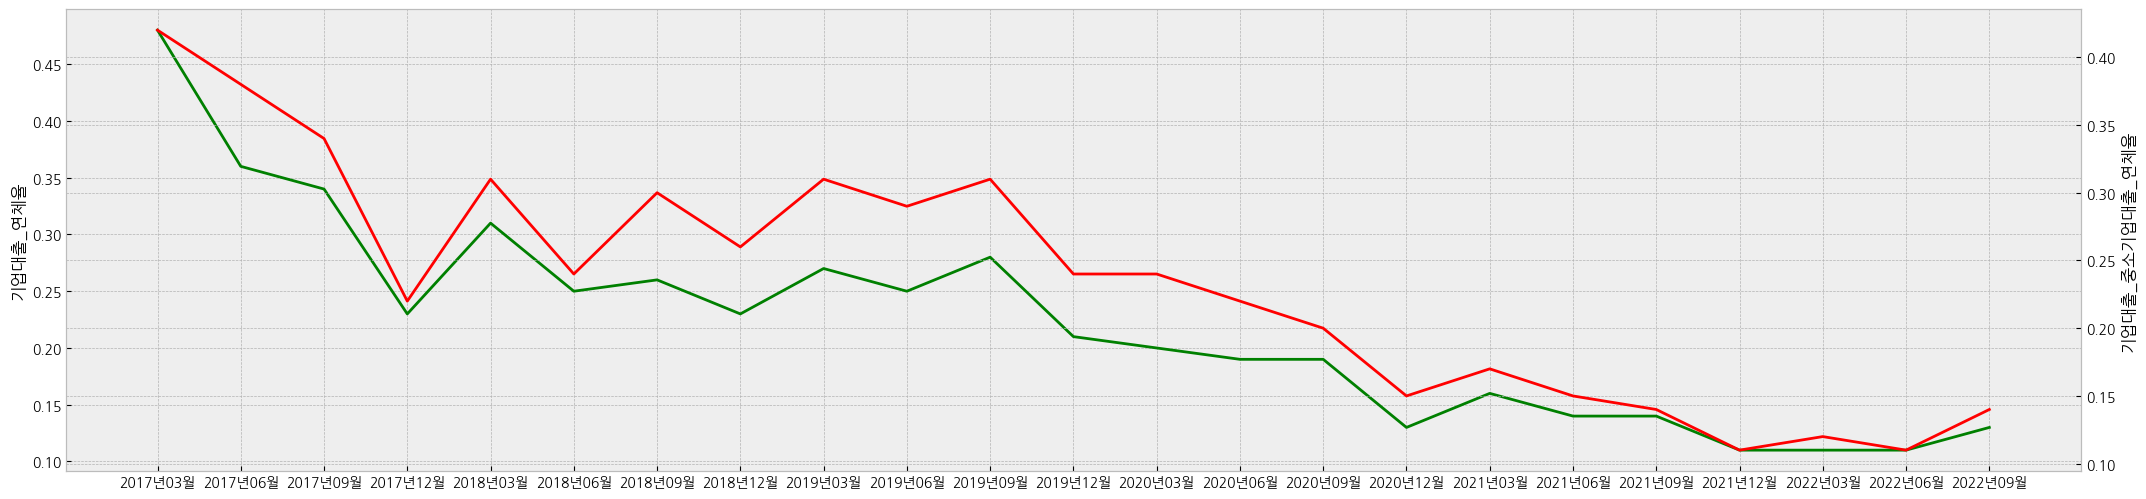



기업대출_연체율 & 기기업대출_중소기업대출_(개인사업자)_연체율 상관계수 : 0.884059750524412


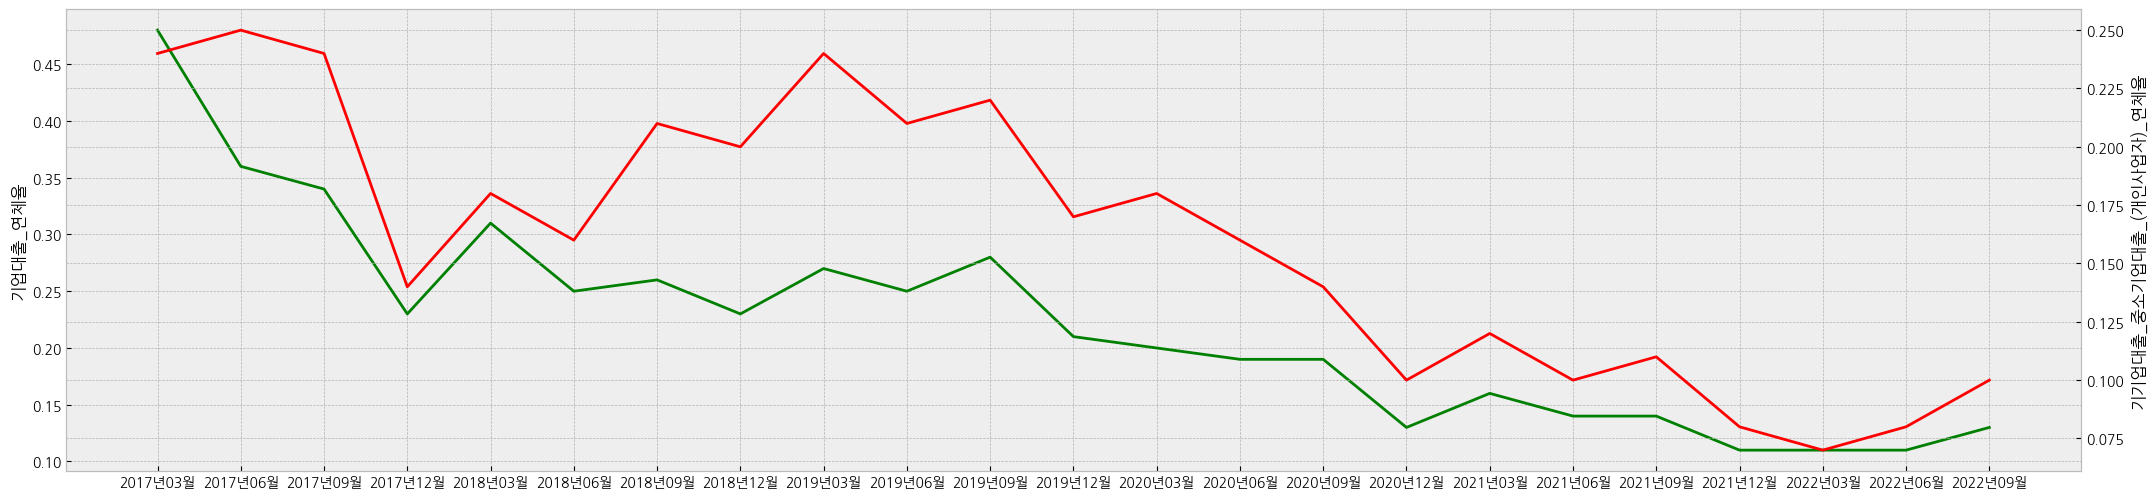



기업대출_연체율 & 고정이하여신비율 상관계수 : 0.9499152759587179


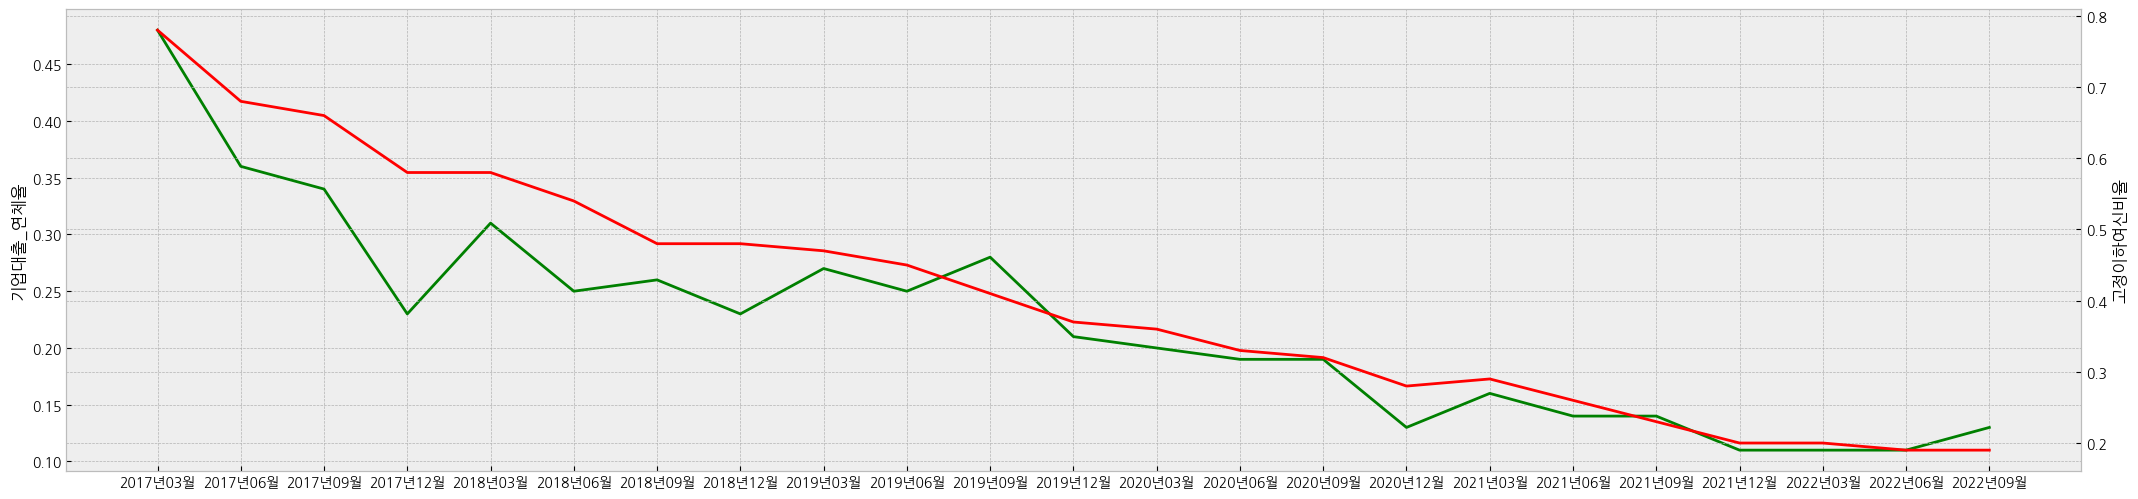



기업대출_연체율 & 대손충당금적립비율(총여신대비) 상관계수 : 0.8478089662286642


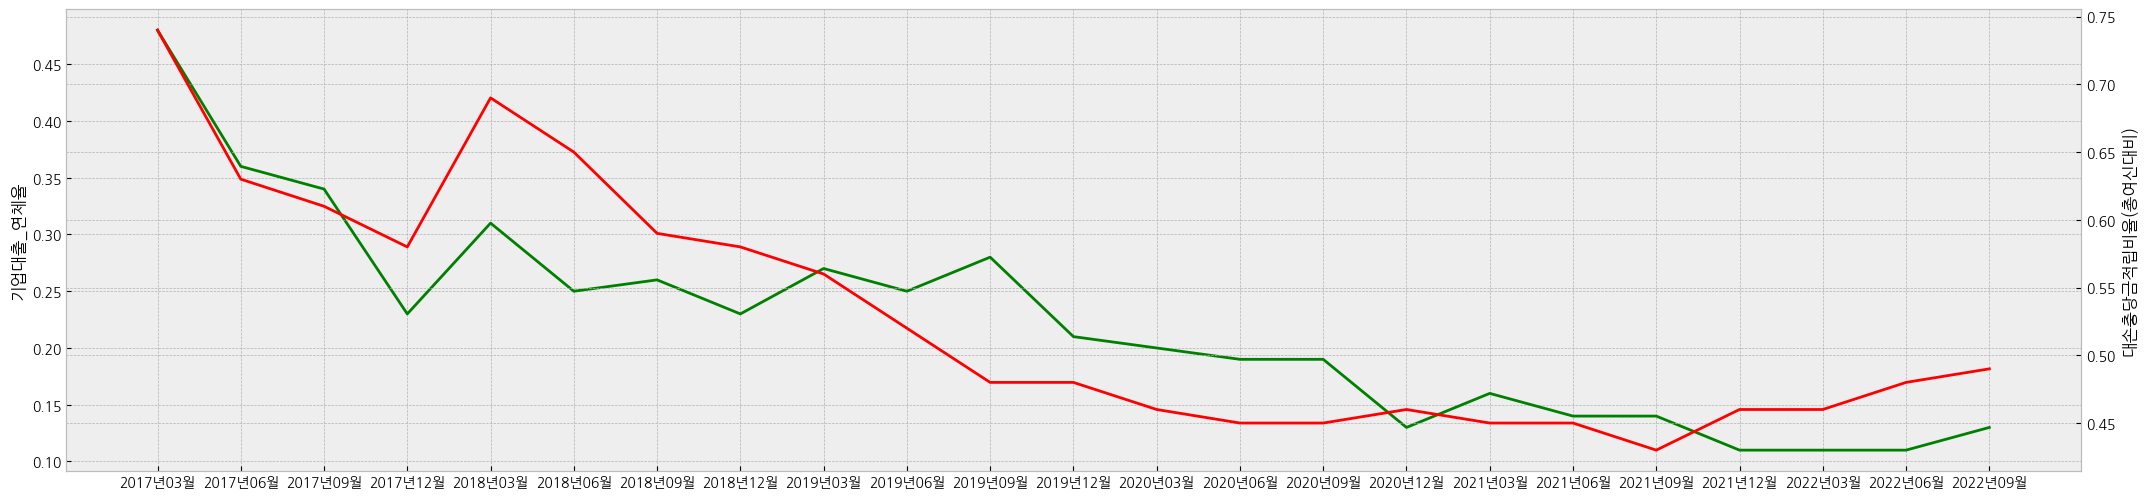



기업대출_연체율 & 대손충당금적립비율(고정이하여신대비) 상관계수 : -0.7973584989054011


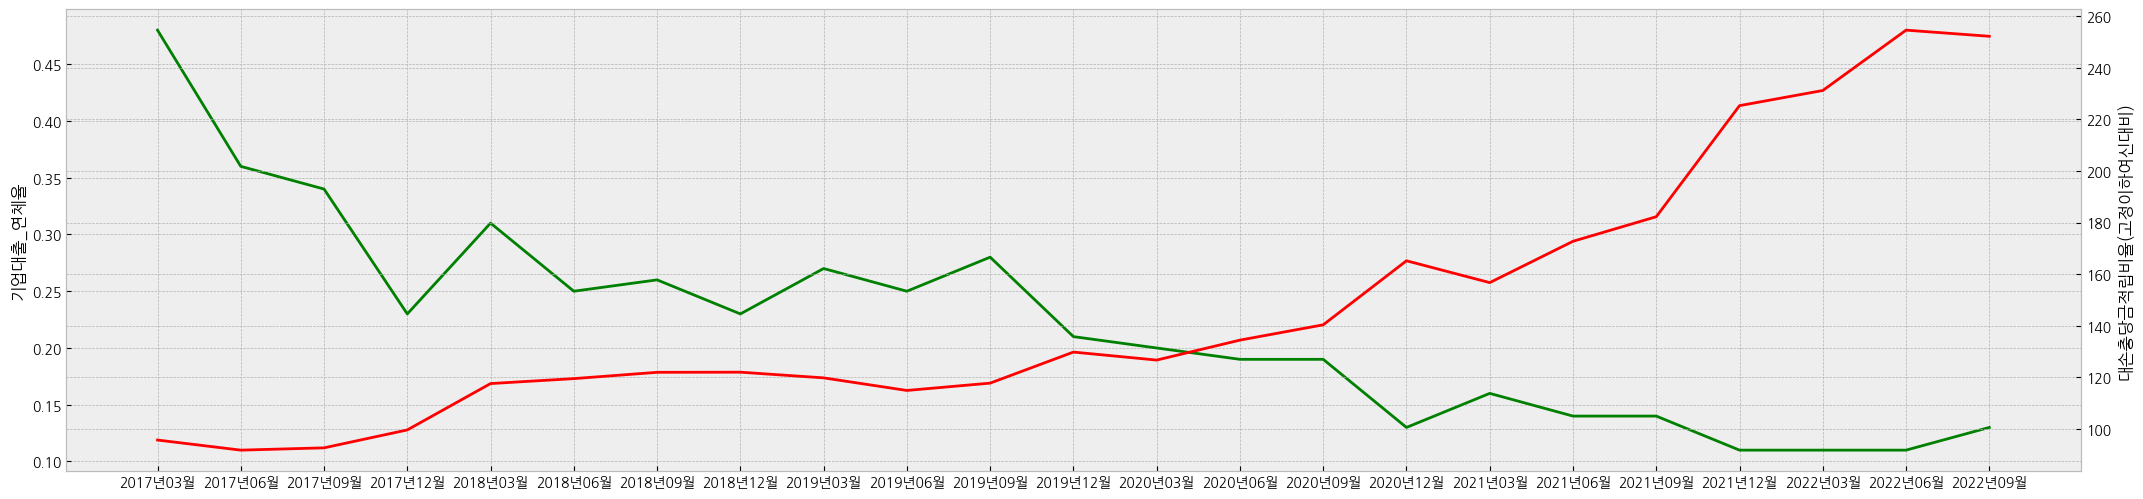



기업대출_연체율 & 업무용고정자산비율 상관계수 : 0.8893996283272364


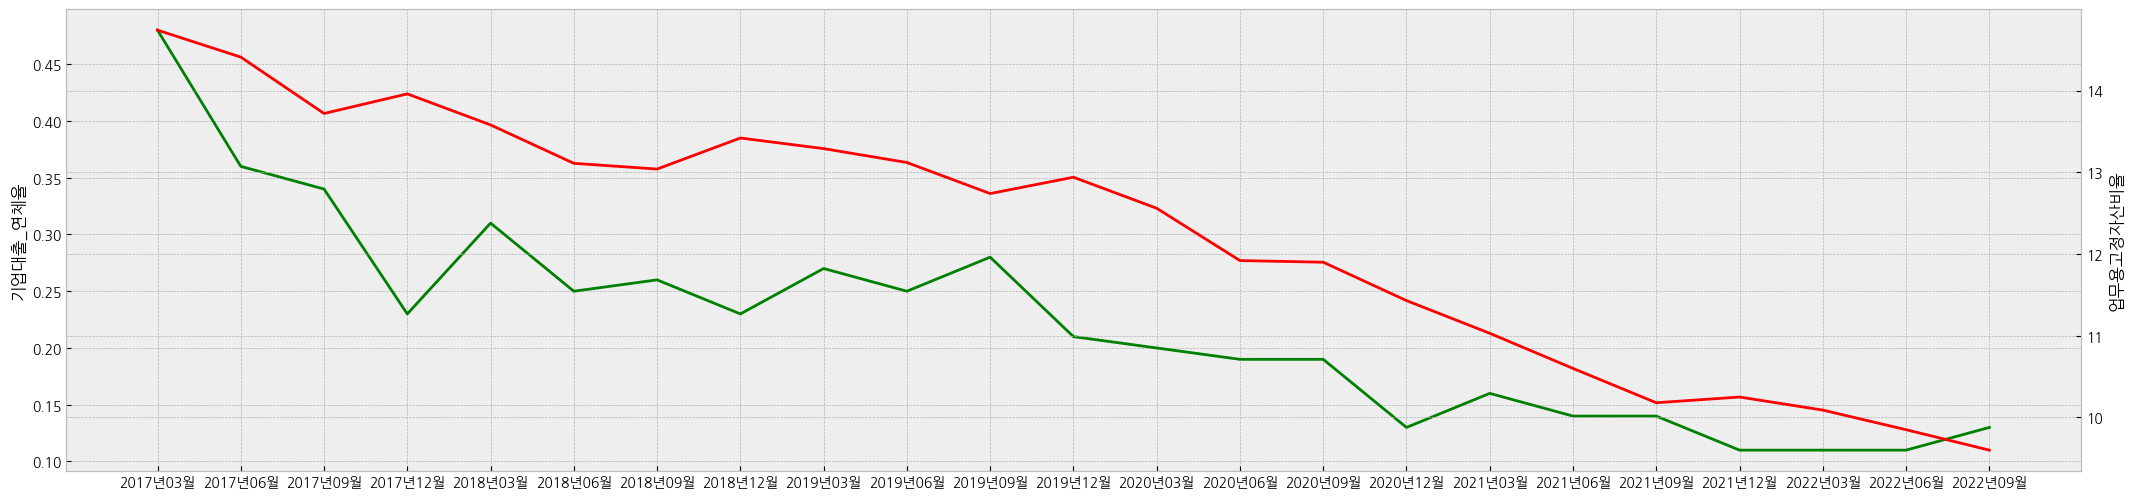



기업대출_연체율 & 업무용고정자산비율_업무용고정자산 상관계수 : -0.1317628702745245


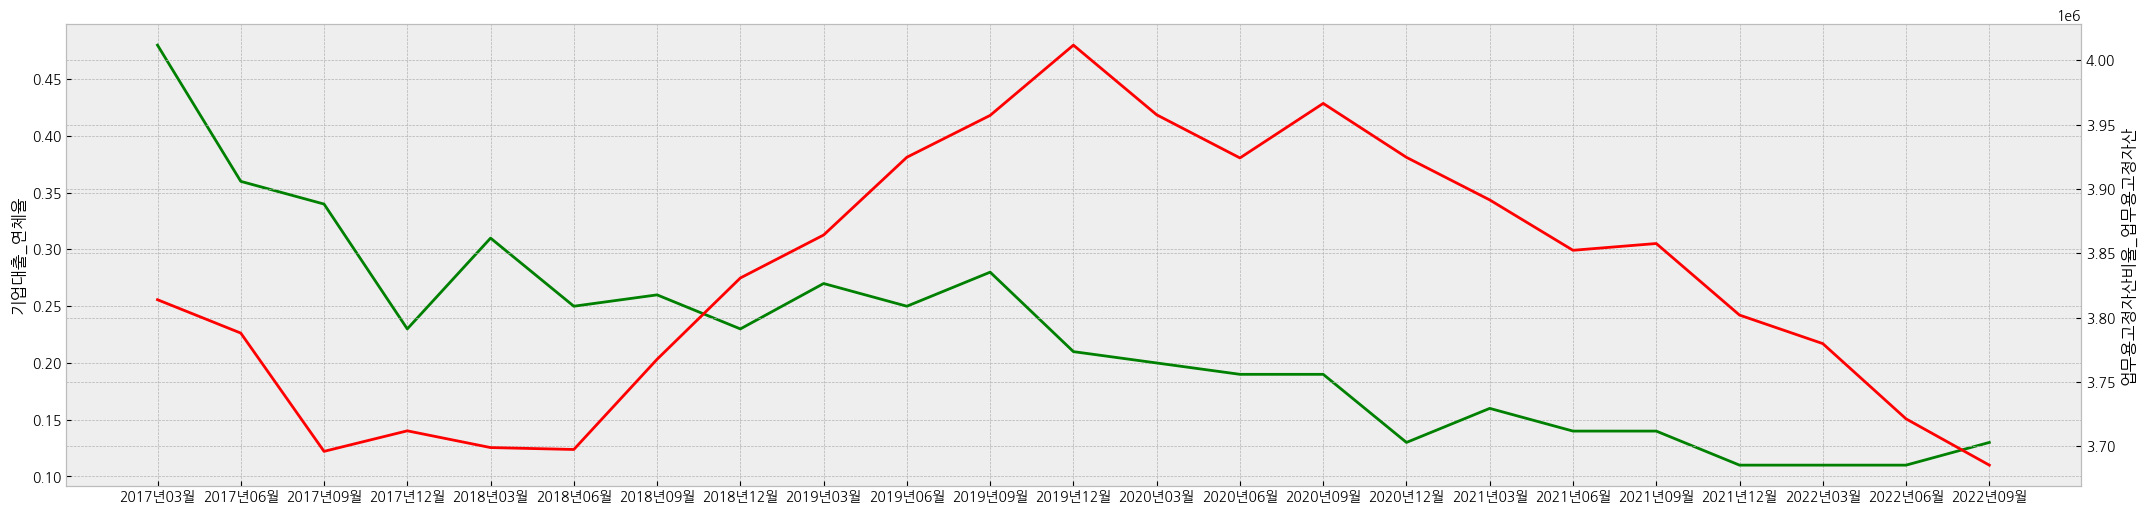



기업대출_연체율 & 업무용고정자산비율_자기자본 상관계수 : -0.8770565662081091


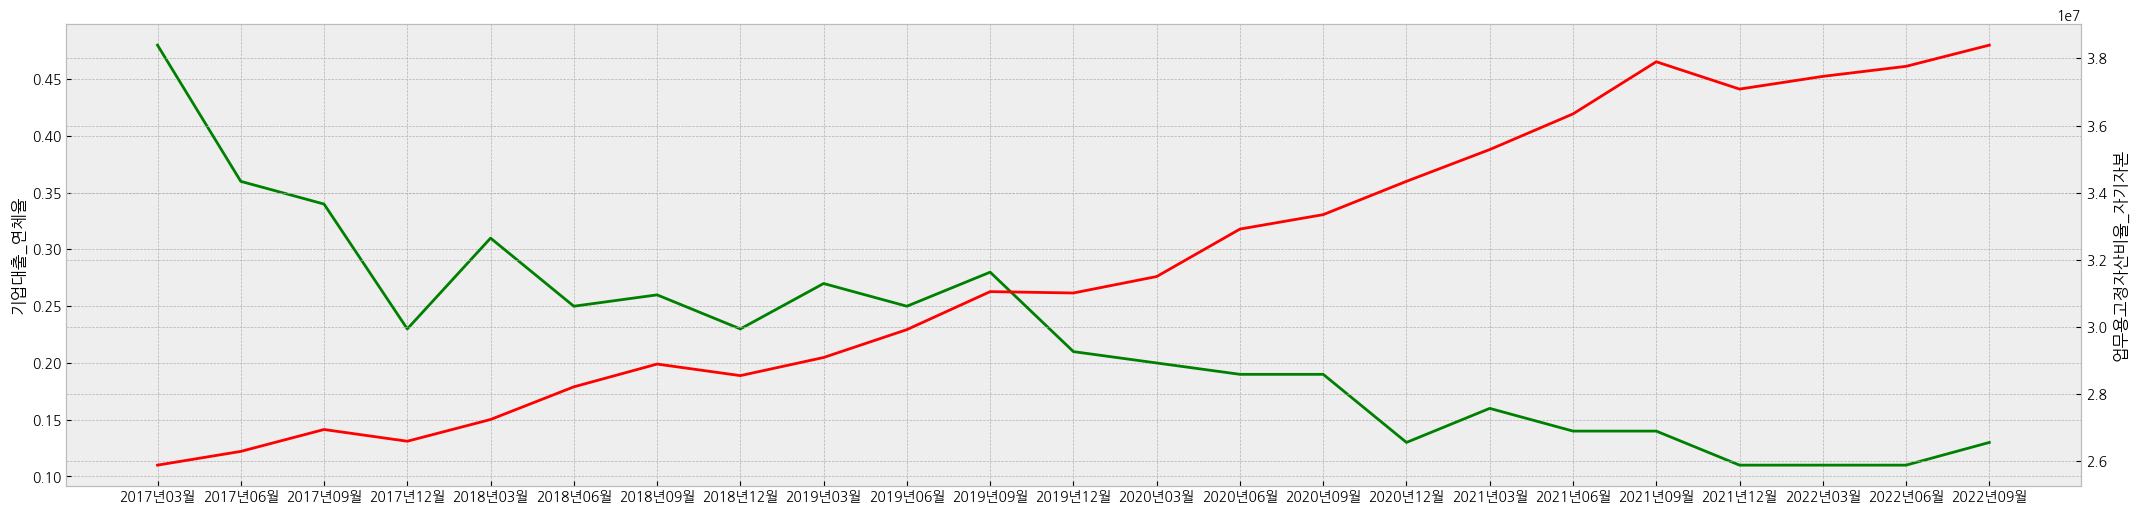



기업대출_연체율 & 유동성커버리지비율 상관계수 : 0.7437236779901134


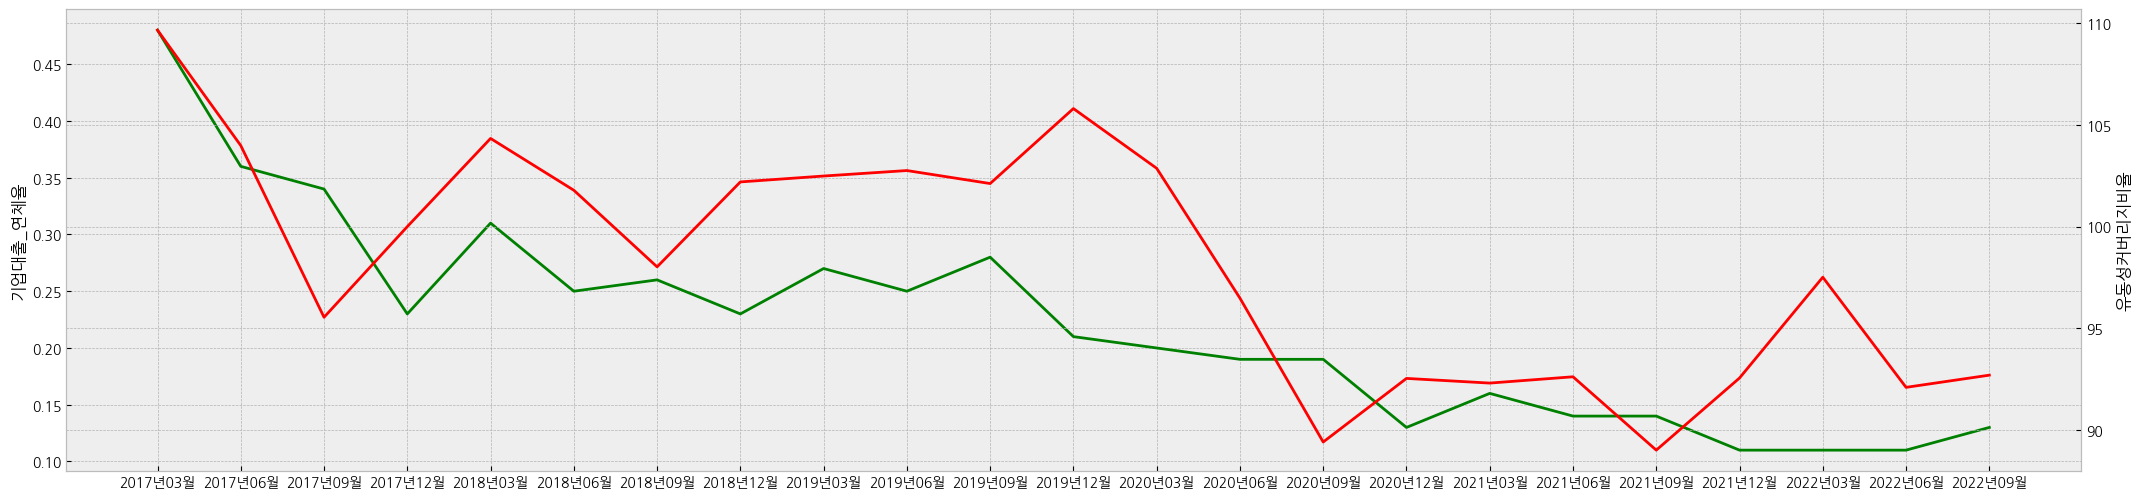



기업대출_연체율 & 유동성커버리지비율_총 고유동성자산 상관계수 : -0.9128040287286816


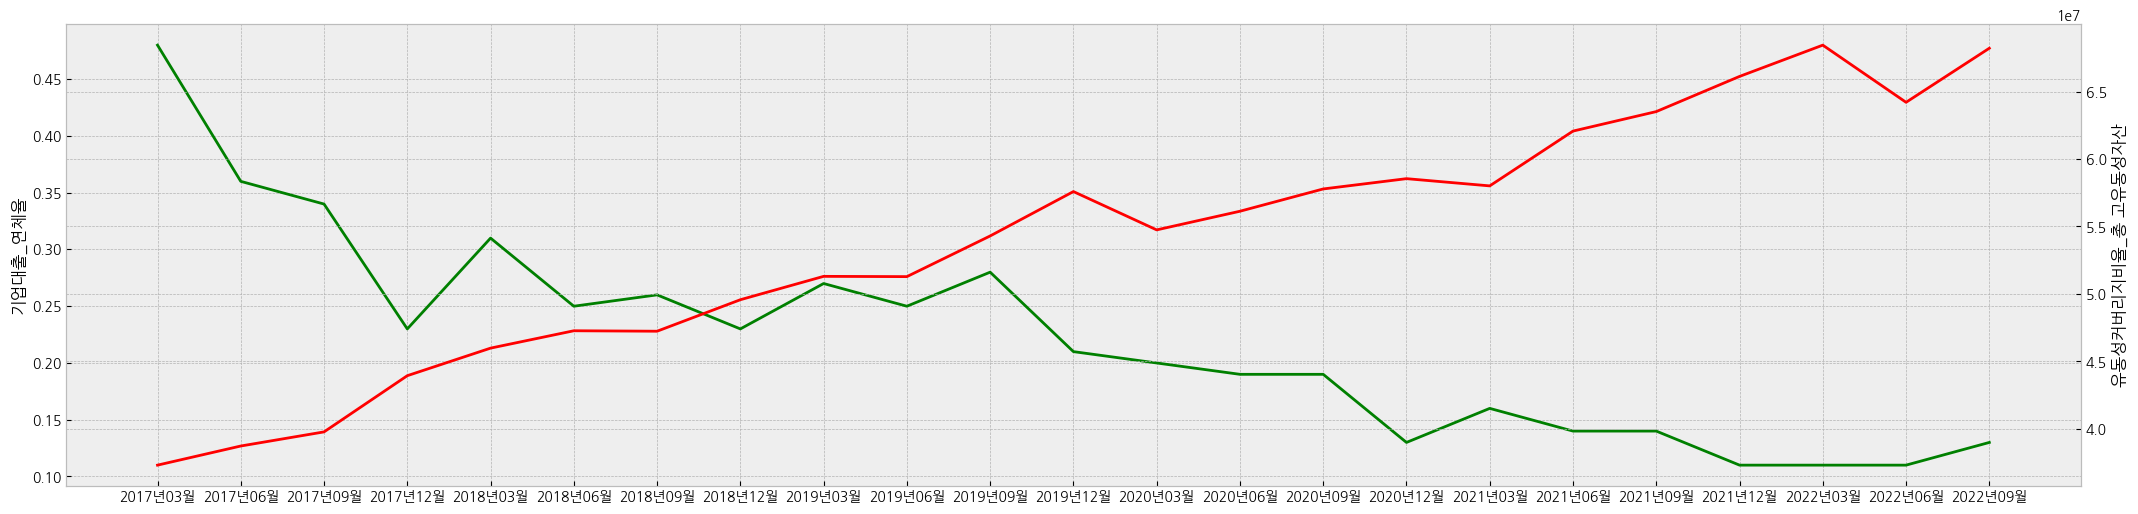



기업대출_연체율 & 유동성커버리지비율_순현금유출액 상관계수 : -0.92008911717622


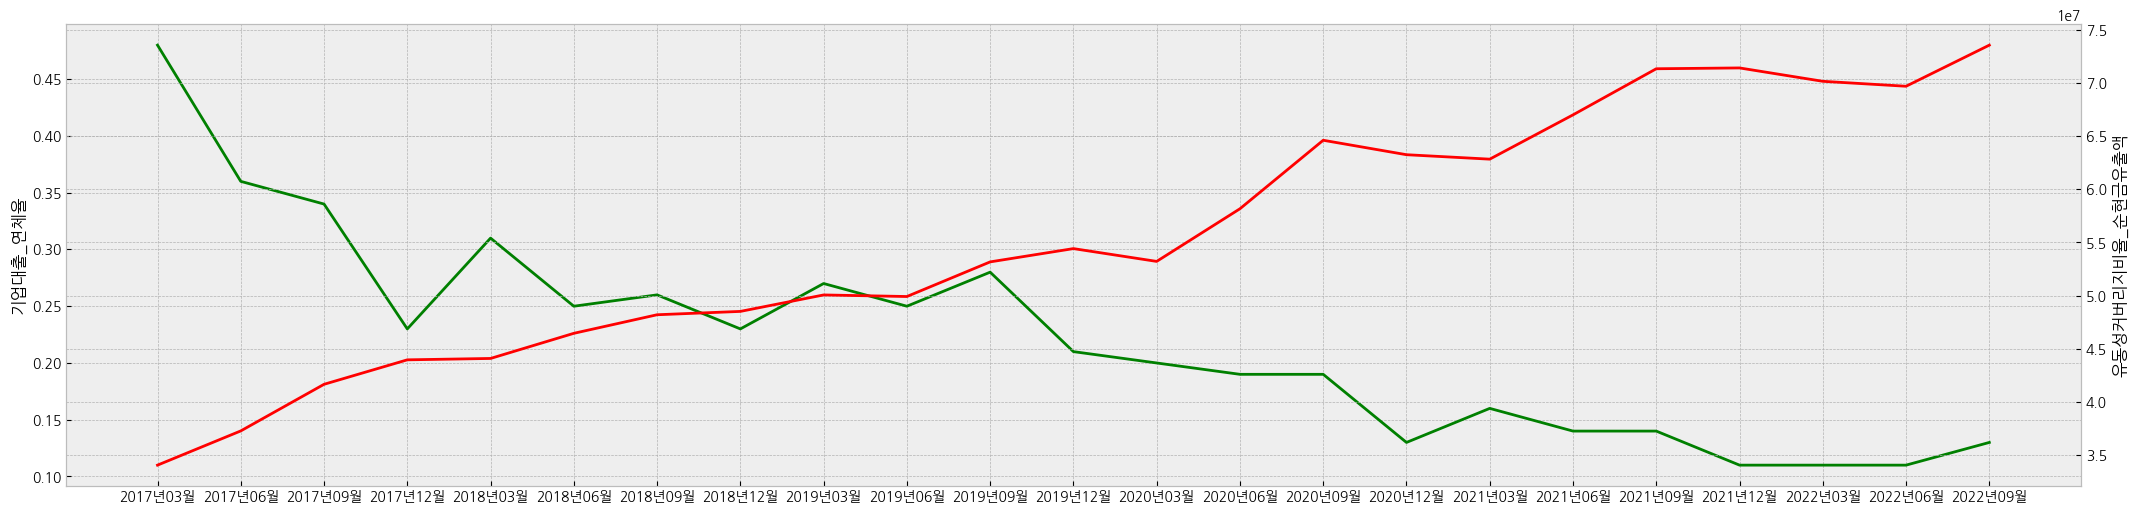



기업대출_연체율 & 순안정자금조달비율 상관계수 : 0.81301664139874


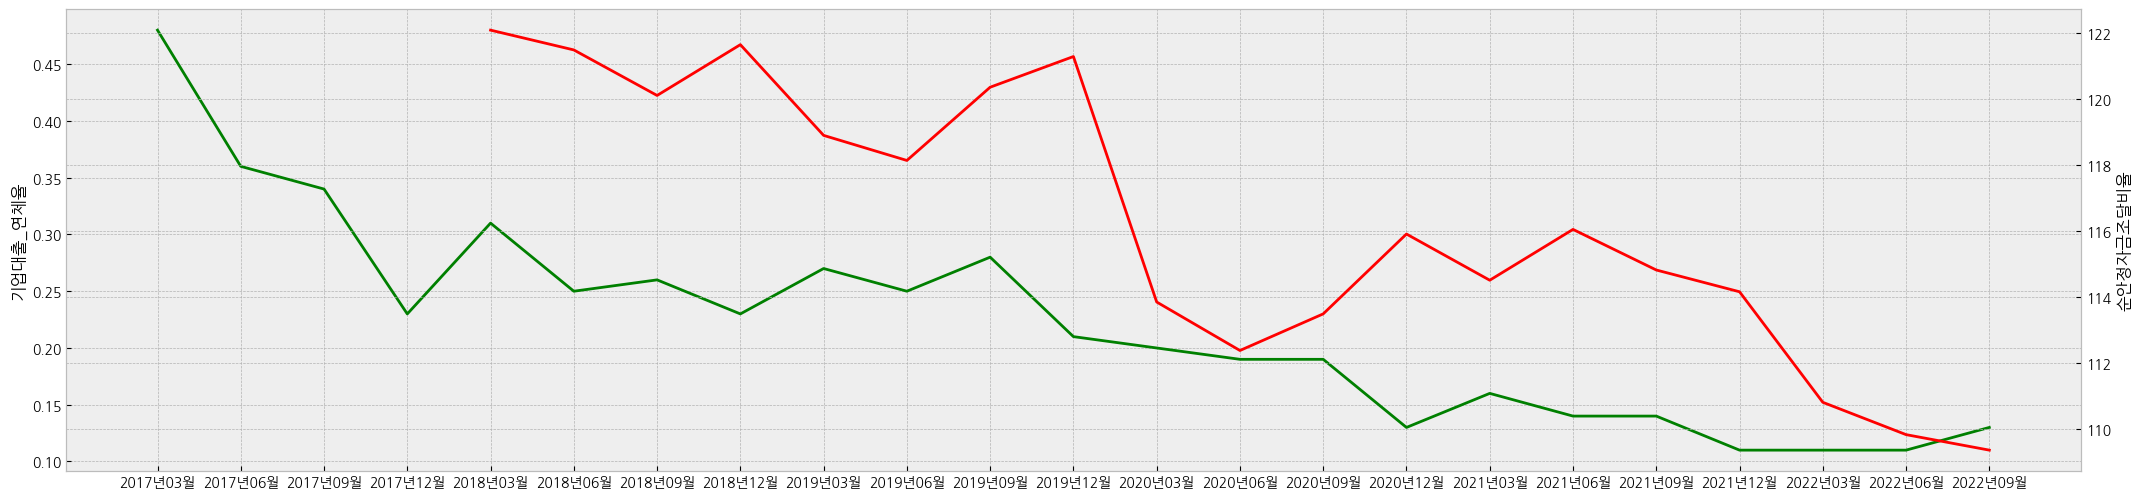



기업대출_연체율 & 순안정자금조달비율_안정자금가용금액 상관계수 : -0.952273928486006


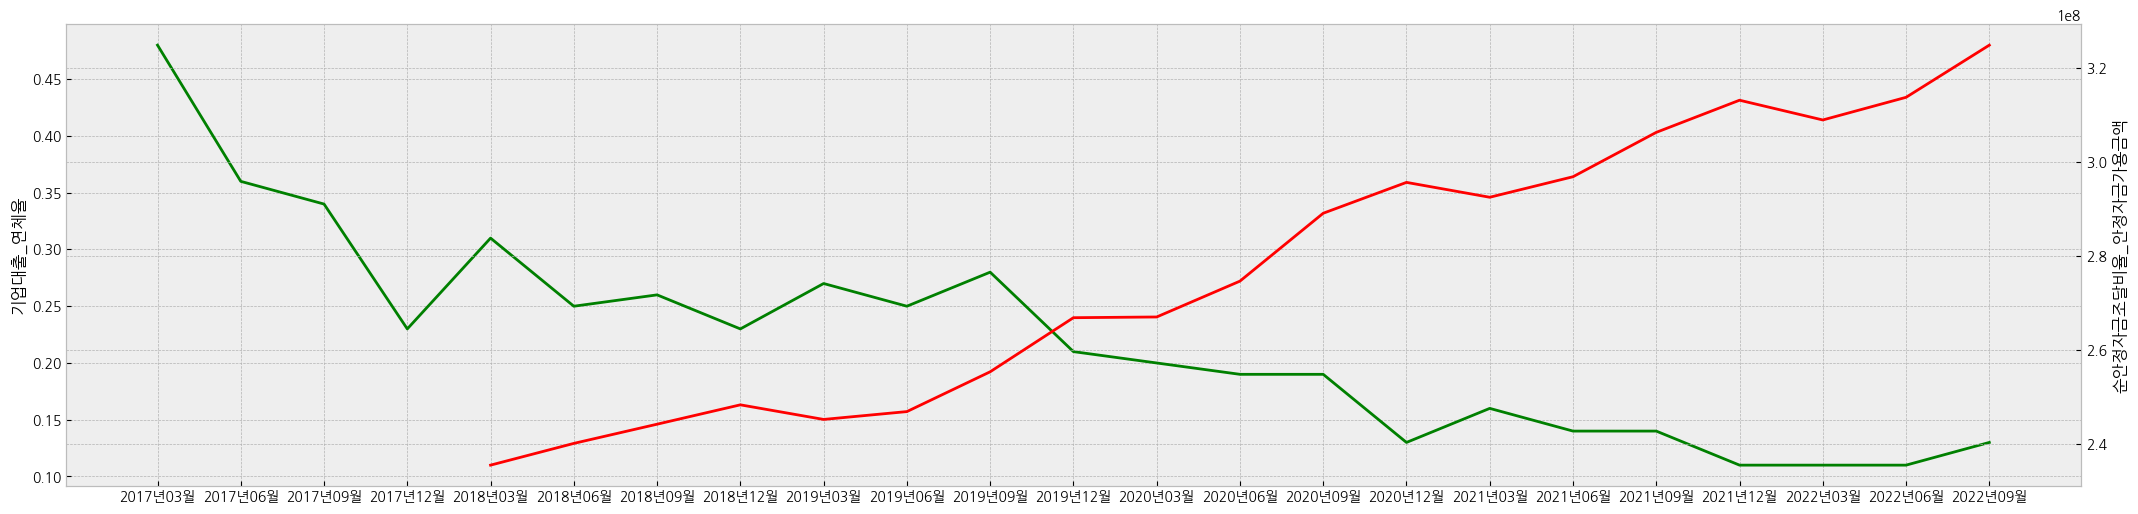



기업대출_연체율 & 순안정자금조달비율_안정자금조달필요금액 상관계수 : -0.9394470776013593


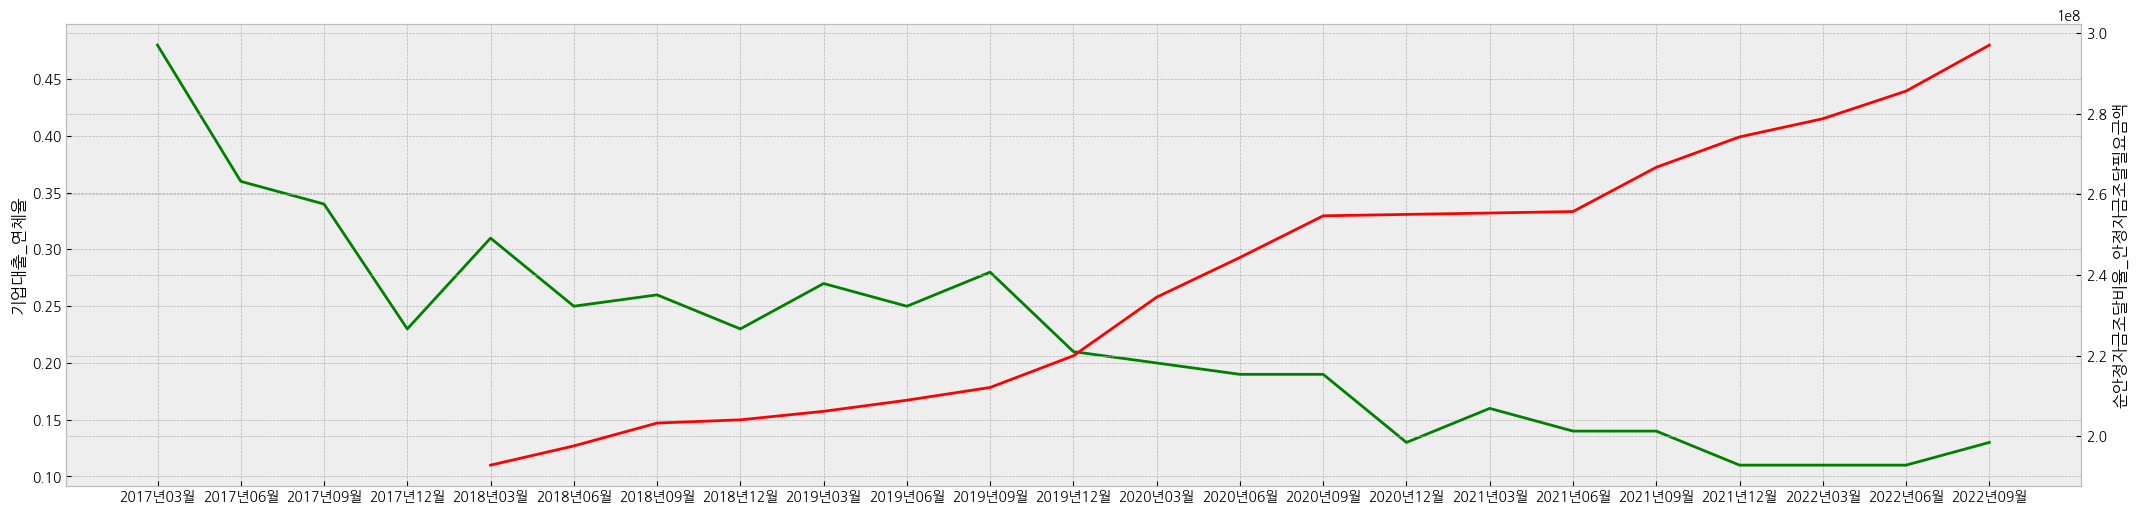



기업대출_연체율 & 기업대출금 계 상관계수 : -0.8770149877505274


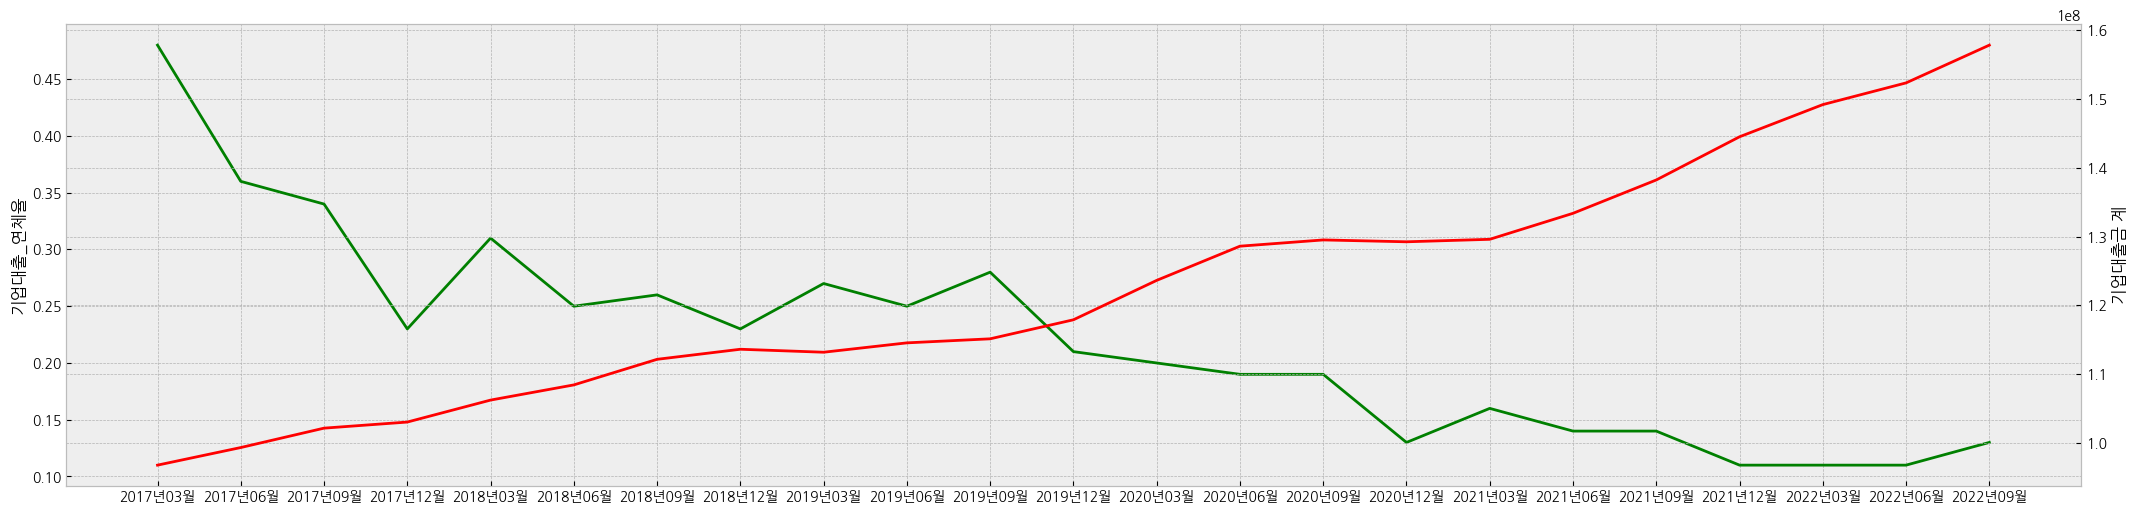



기업대출_연체율 & 건설업 상관계수 : -0.20221969102260845


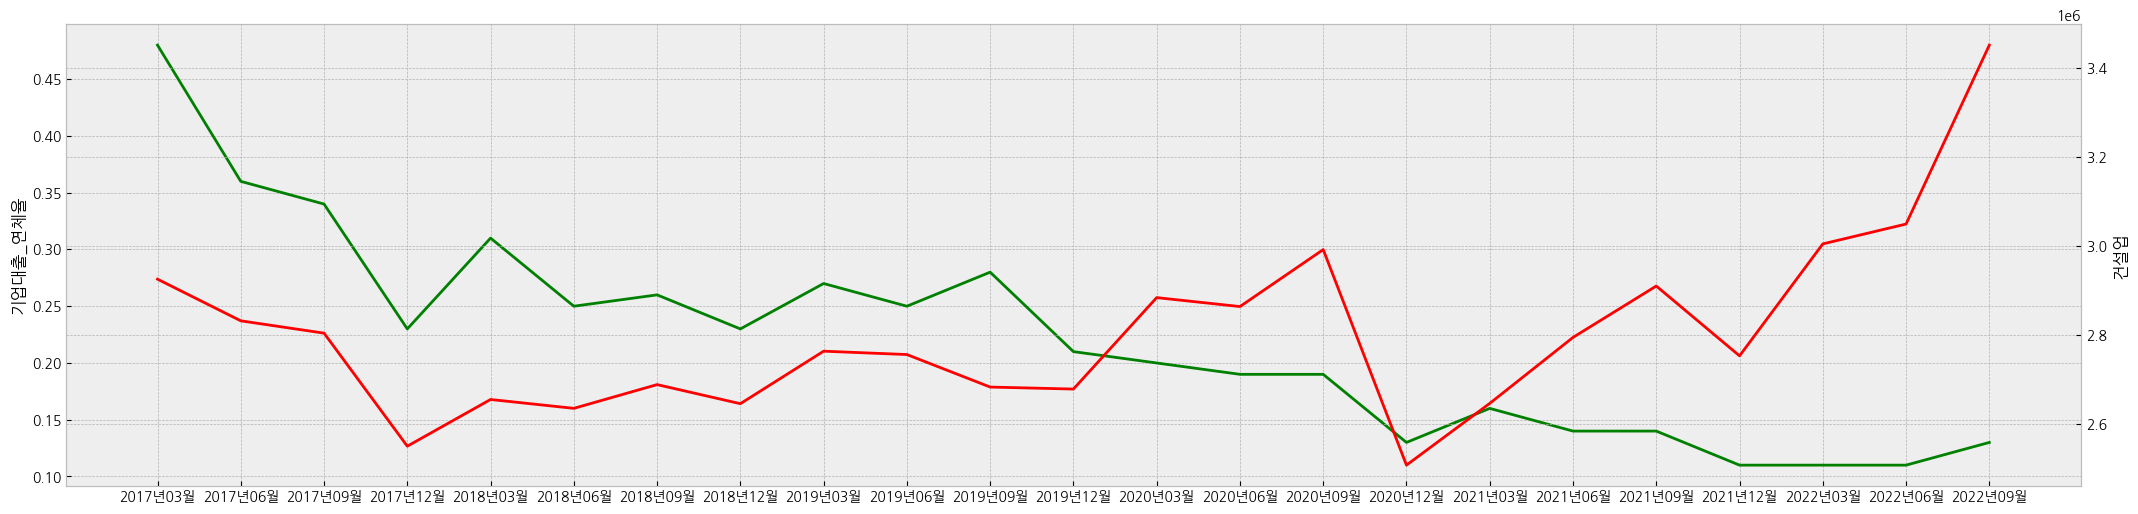



기업대출_연체율 & 부동산및임대업 상관계수 : -0.8677060408936975


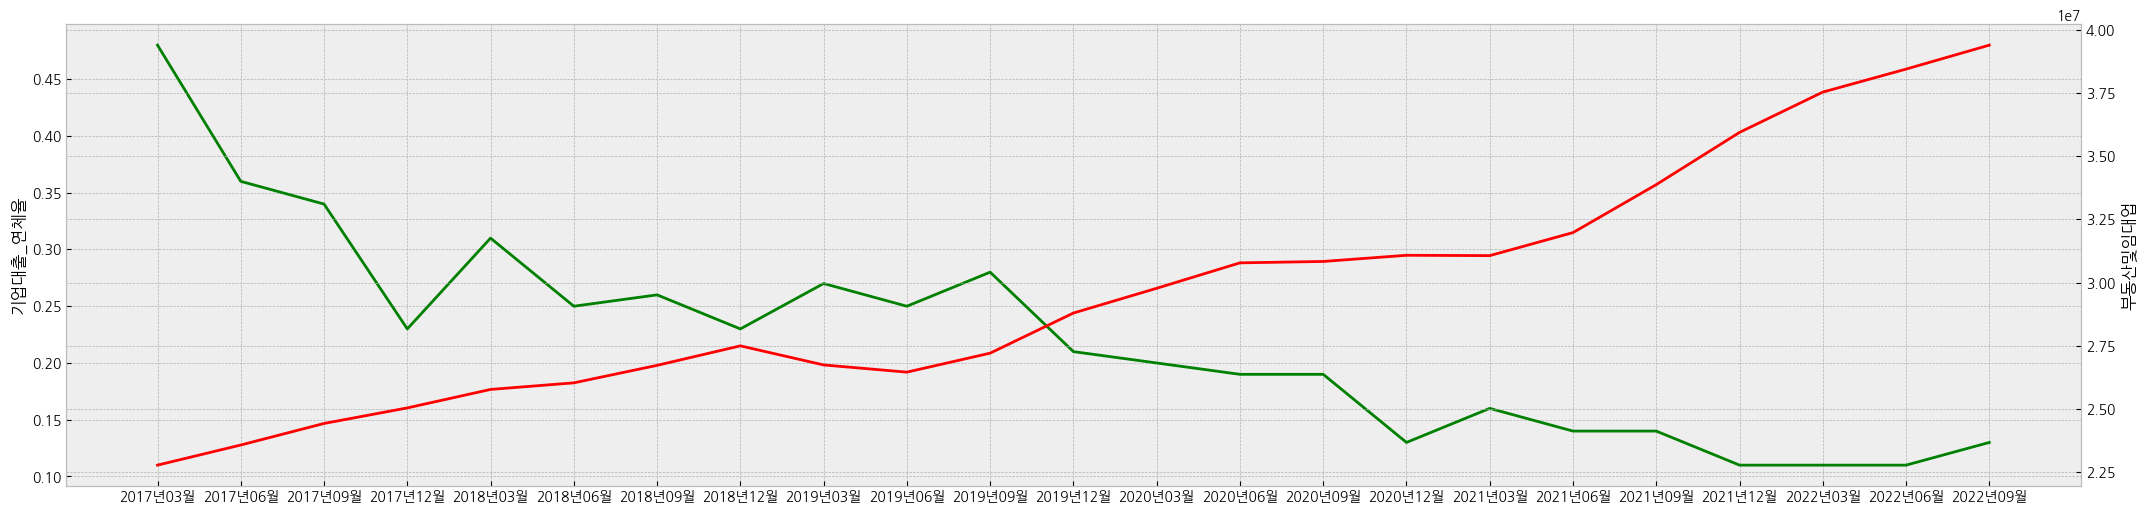



기업대출_연체율 & 건설/부동산/임대 대출금 비율 상관계수 : -0.1448494871072559


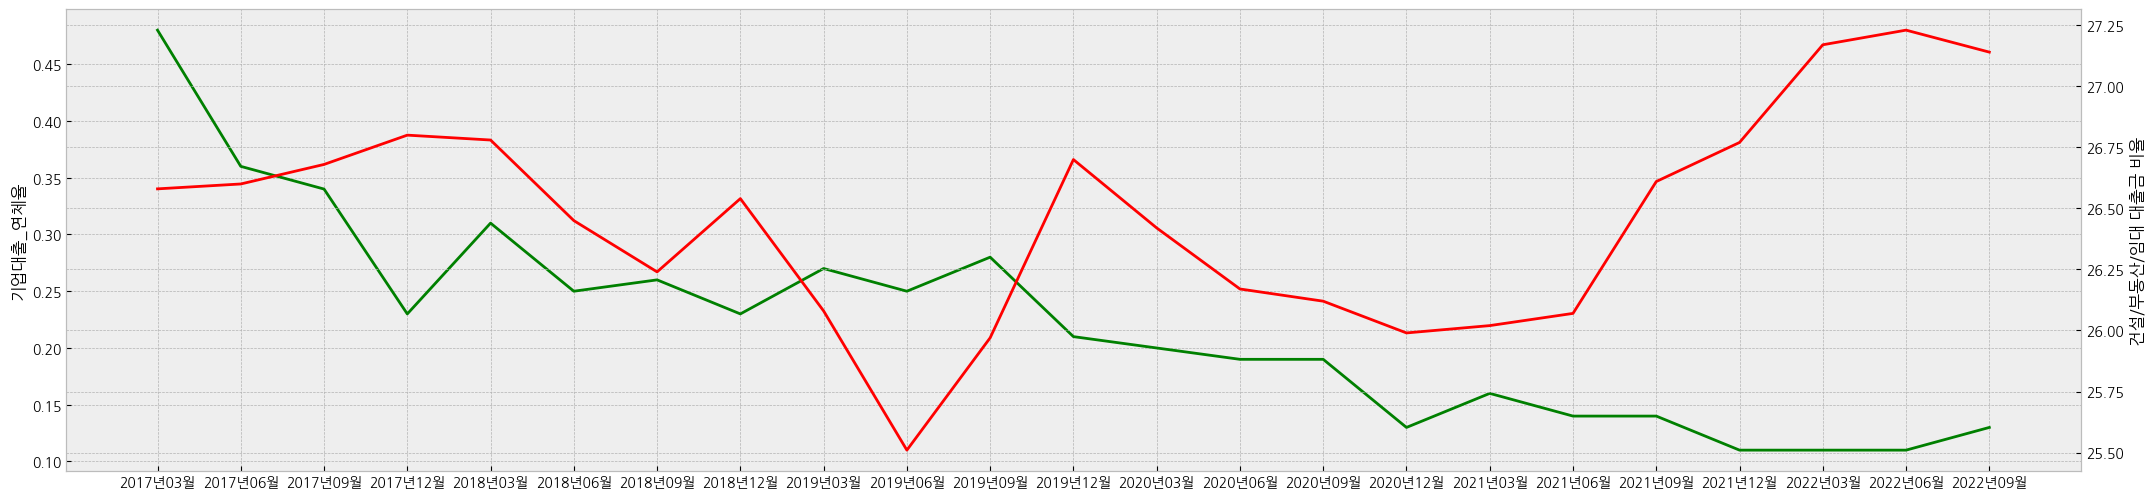

In [191]:
plt.ioff()
std_var = '기업대출_연체율'

for col in df_kb.columns:
    if '순안정자금조달비율' in col:
        std_vector = df_kb.dropna()[std_var]
        oth_vector = df_kb.dropna()[col]
    elif col == std_var:
        continue
    else:
        std_vector = df_kb[std_var]
        oth_vector = df_kb[col]
        
    print(f'{std_var} & {col} 상관계수 : {np.corrcoef(std_vector, oth_vector)[0, 1]}')
    plt.figure(figsize=(26, 6))
    sns.lineplot(data=df_kb[std_var], color='g')
    sns.lineplot(data=df_kb[col], color='r', ax=plt.twinx())
    plt.show()
    print()
    print('=' * 100)
    print()

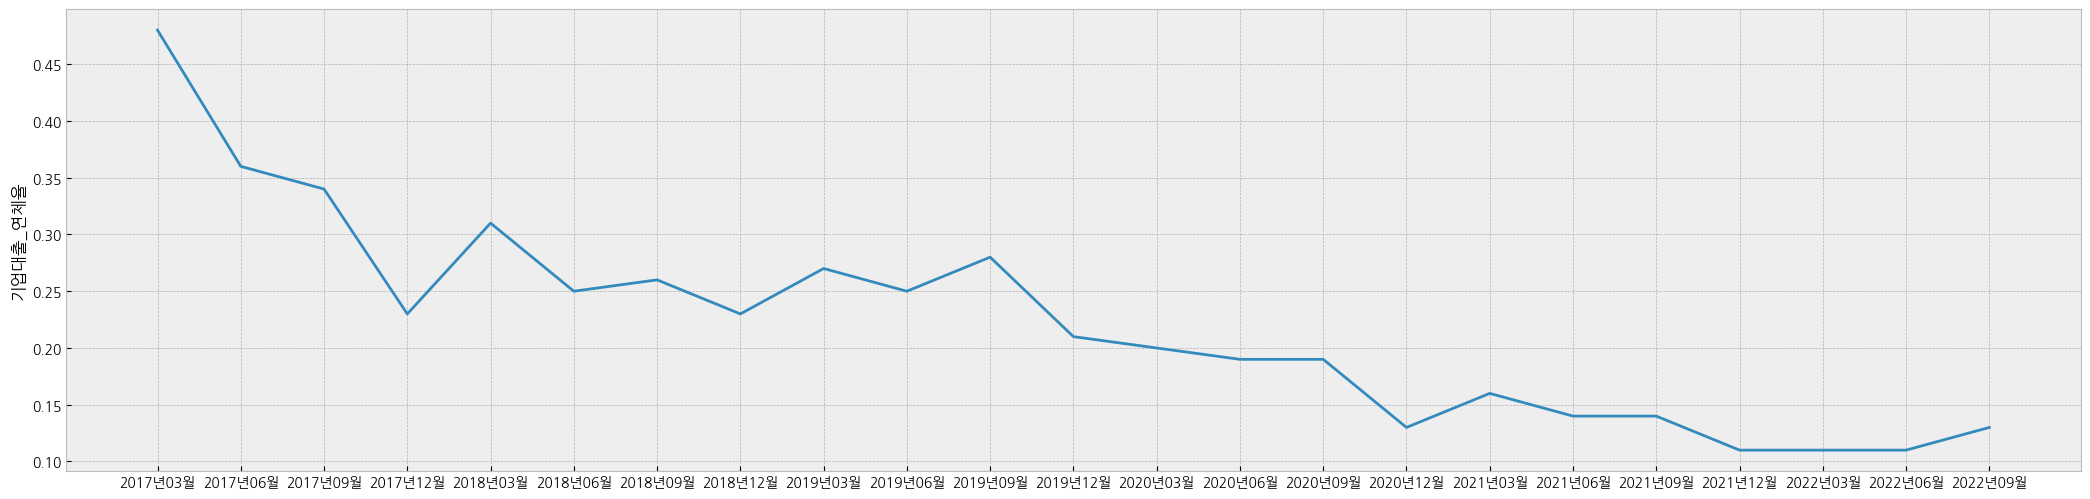

In [77]:
plt.figure(figsize=(26, 6))
sns.lineplot(
    data=df_kb['기업대출_연체율']
);

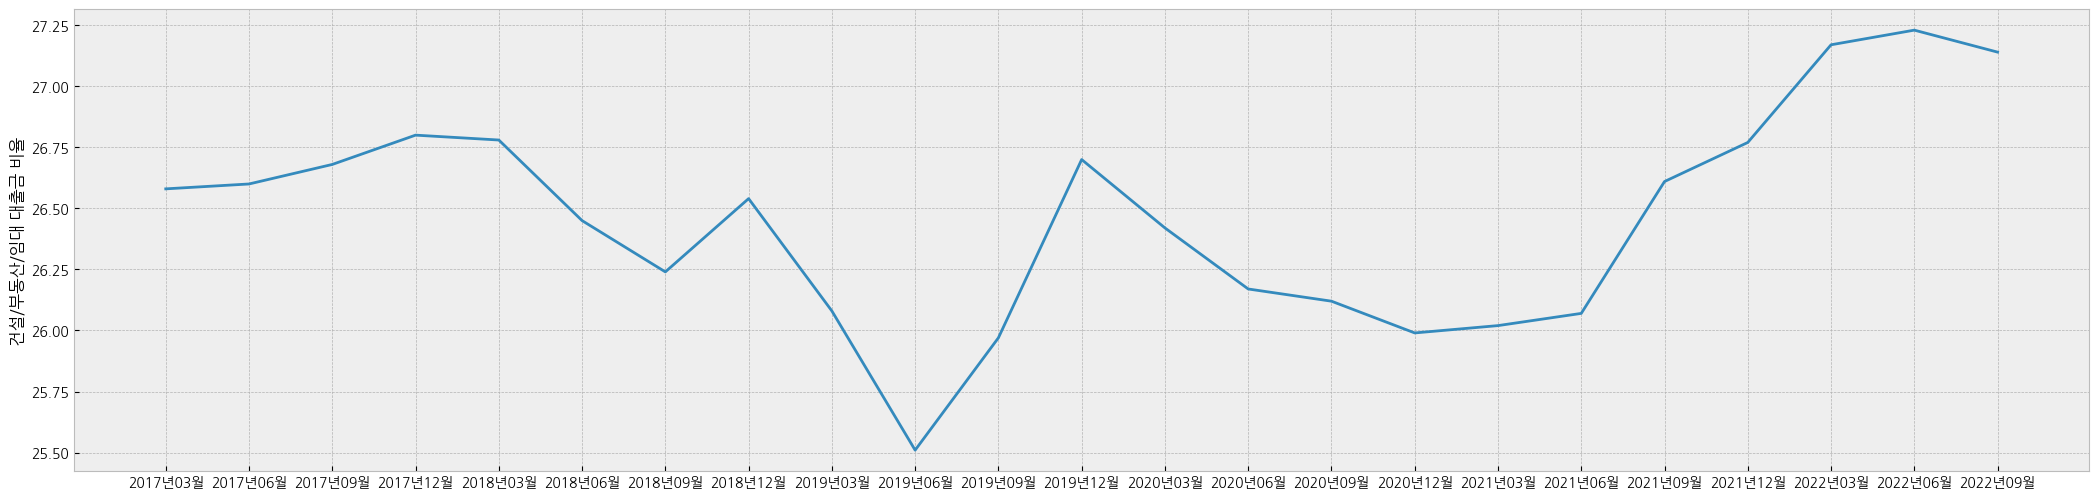

In [78]:
plt.figure(figsize=(26, 6))
sns.lineplot(
    data=df_kb['건설/부동산/임대 대출금 비율']
);

In [63]:
np.corrcoef(df_kb['기업대출_연체율'], df_kb['건설/부동산/임대 대출금 비율'])[0, 1]

-0.1448494871072559

### '기업대출_연체율' & '고정이하여신비율' 의 상관계수

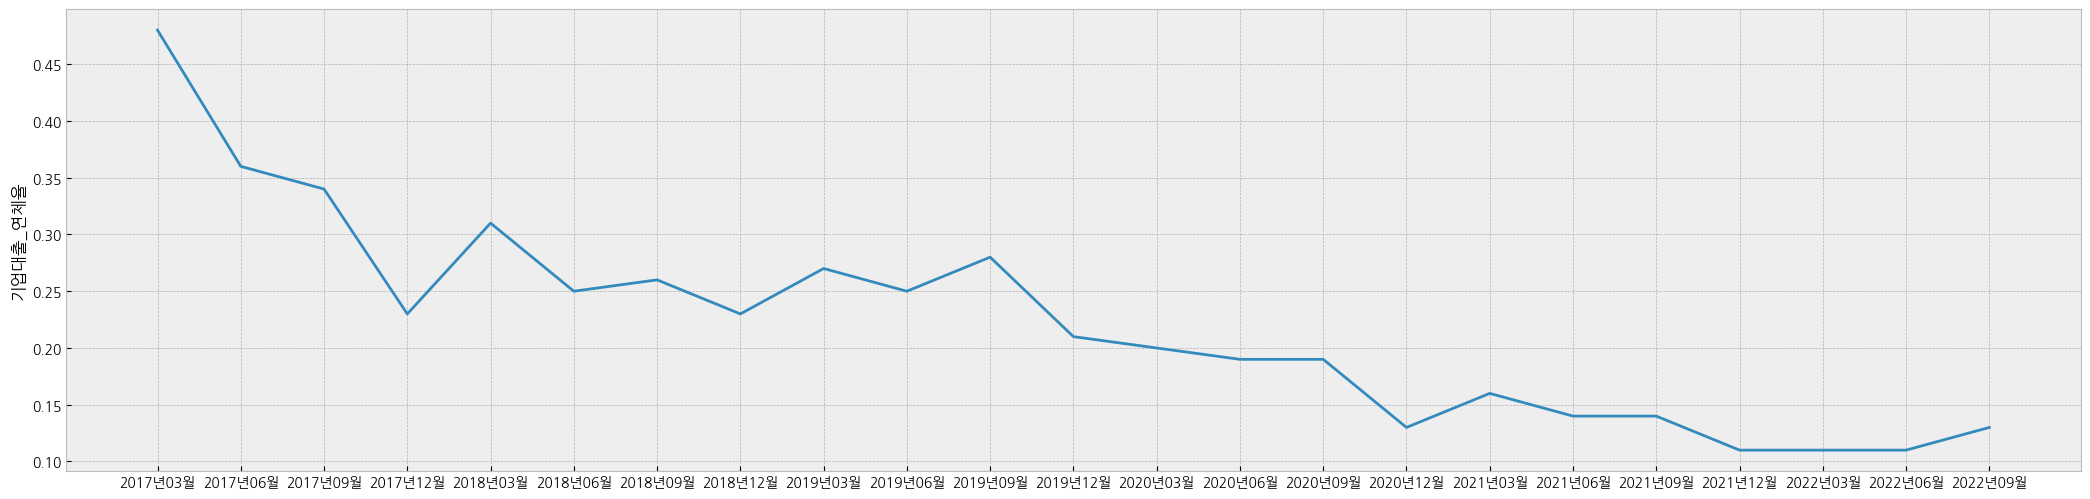

In [79]:
plt.figure(figsize=(26, 6))
sns.lineplot(
    data=df_kb['기업대출_연체율']
);

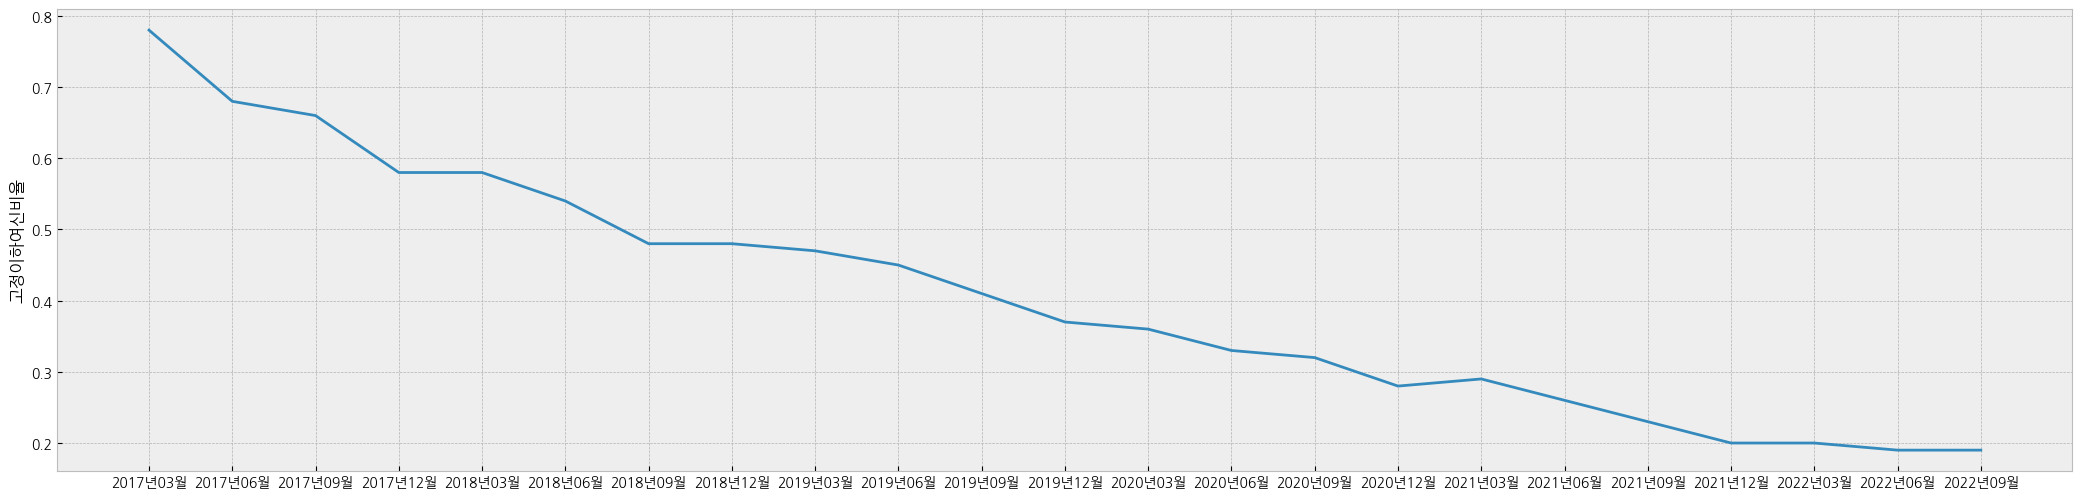

In [80]:
plt.figure(figsize=(26, 6))
sns.lineplot(
    data=df_kb['고정이하여신비율']
);

In [64]:
np.corrcoef(df_kb['기업대출_연체율'], df_kb['고정이하여신비율'])[0, 1]

0.9499152759587179

### '기업대출_연체율' & '대손충당금적립비율' 의 상관계수

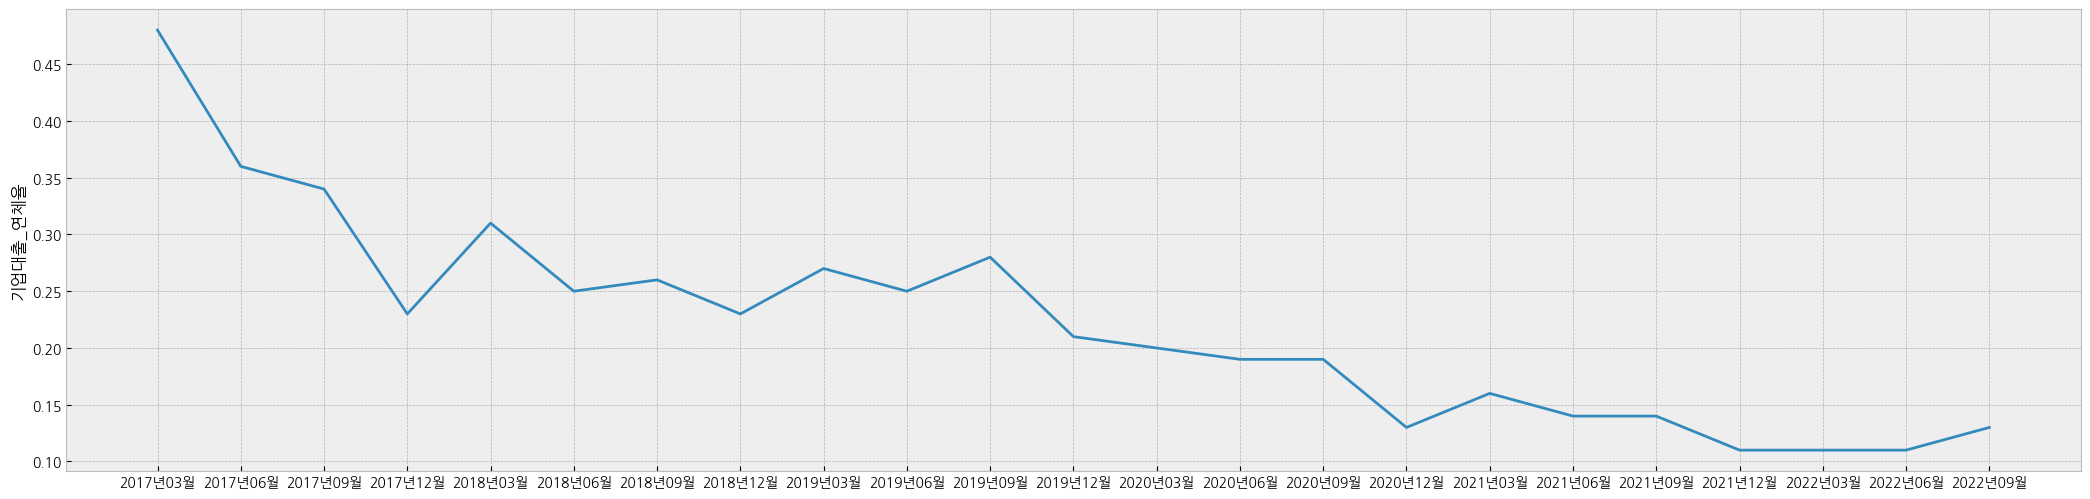

In [82]:
plt.figure(figsize=(26, 6))
sns.lineplot(
    data=df_kb['기업대출_연체율']
);

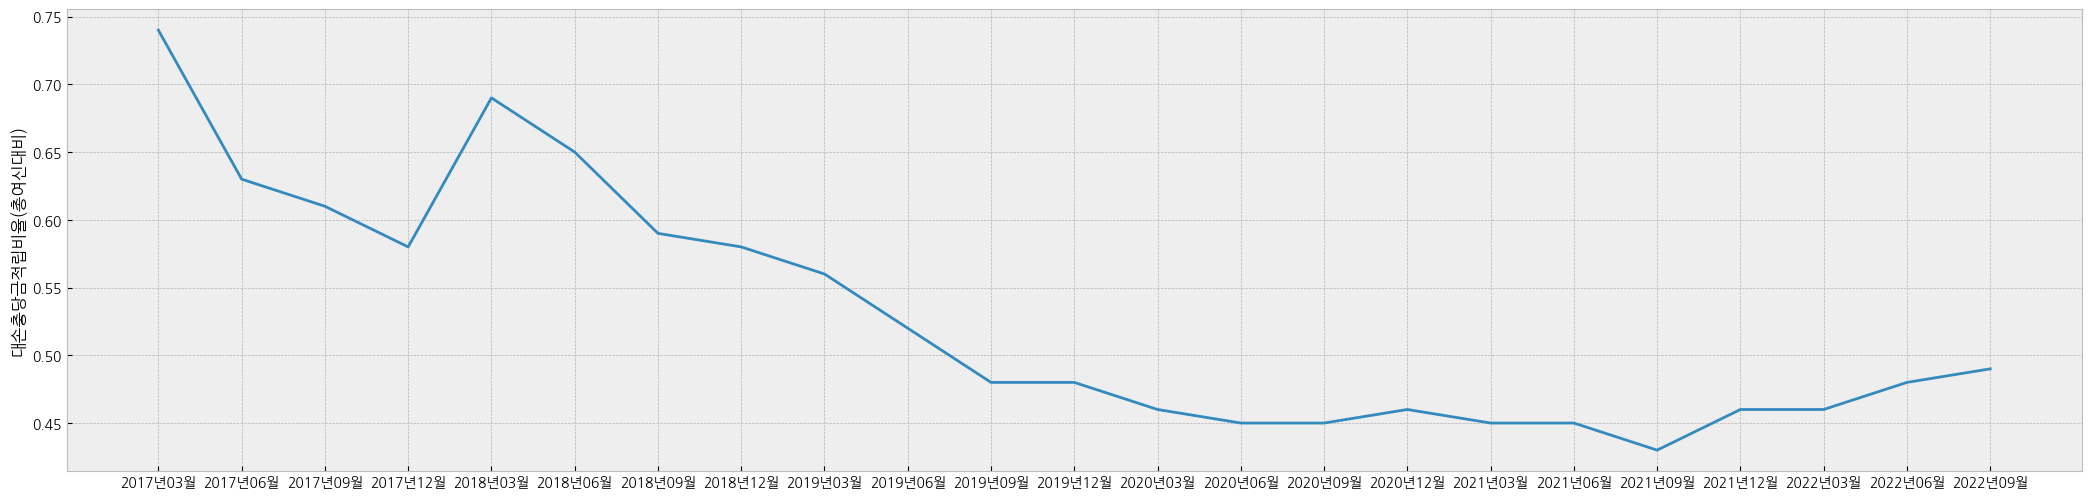

In [81]:
plt.figure(figsize=(26, 6))
sns.lineplot(
    data=df_kb['대손충당금적립비율(총여신대비)']
);

In [66]:
np.corrcoef(df_kb['기업대출_연체율'], df_kb['대손충당금적립비율(총여신대비)'])[0, 1]

0.8478089662286642

### '기업대출_연체율' & '유동성커버리지비율' 의 상관계수

In [83]:
np.corrcoef(df_kb['기업대출_연체율'], df_kb['유동성커버리지비율'])[0, 1]

0.7437236779901134

### '유동성커버리지비율' & '건설/부동산/임대 대출금 비율' 의 상관계수

In [84]:
np.corrcoef(df_kb['유동성커버리지비율'], df_kb['건설/부동산/임대 대출금 비율'])[0, 1]

-0.052057172058892015

### '유동성커버리지비율' & '고정이하여신비율' 의 상관계수

In [85]:
np.corrcoef(df_kb['유동성커버리지비율'], df_kb['고정이하여신비율'])[0, 1]

0.723741540683287

### '유동성커버리지비율' & '대손충당금적립비율' 의 상관계수

In [87]:
np.corrcoef(df_kb['유동성커버리지비율'], df_kb['대손충당금적립비율(총여신대비)'])[0, 1]

0.6776312146727259